In [1]:
# Load libraries
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date

#Import Model Packages 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from sklearn.decomposition import PCA


#Package for optimization of mean variance optimization
import cvxopt as opt
from cvxopt import blas, solvers

#network diagrams
import networkx as nx


import quantstats as qs

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('eikon.csv')

In [4]:
df

,Date,005930.KS,601988.SS,6758.T,BABA.K,BASFn.DE,BHPB.L,KO,MDT,PG,RDSa.AS,RTX,SAPG.DE,SASY.PA,SCHN.PA,VOD.L,VOWG_p.DE,WMT
0,1990-01-02T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,4.87500,2.046875,8.745084,8.423295,4.091839,NaN,9.831230,17.836910,26.772856,NaN,5.89075
1,1990-01-03T00:00:00Z,463.404554,NaN,NaN,NaN,NaN,NaN,4.80475,2.054688,8.729579,8.536740,4.045760,NaN,9.735950,17.874621,27.106682,NaN,5.89075
2,1990-01-04T00:00:00Z,468.576480,NaN,NaN,NaN,NaN,NaN,4.78125,2.105500,8.559019,8.360900,4.036544,NaN,9.891863,18.006606,26.706091,NaN,5.85950
3,1990-01-05T00:00:00Z,458.232628,NaN,NaN,NaN,NaN,NaN,4.74225,2.148438,8.403964,8.224766,4.036544,NaN,9.839892,18.044316,26.372265,NaN,5.79700
4,1990-01-06T00:00:00Z,460.301399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8554,2021-05-05T00:00:00Z,NaN,NaN,NaN,226.78,69.36,2306.0,54.00000,127.000000,133.460000,16.494000,84.130000,115.84,84.590000,134.540000,140.540000,218.00,140.60000
8555,2021-05-06T00:00:00Z,82300.000000,3.26,10715.0,226.42,70.22,2314.0,54.54000,127.300000,135.140000,16.510000,84.680000,116.42,84.300000,134.180000,142.020000,212.40,141.05000
8556,2021-05-07T00:00:00Z,81900.000000,3.28,10470.0,225.31,70.38,2337.5,54.51000,126.700000,135.150000,16.612000,85.710000,117.36,85.440000,134.960000,141.820000,210.75,140.20000
8557,2021-05-10T00:00:00Z,83200.000000,3.26,10780.0,219.53,70.76,2375.5,54.91000,126.900000,137.670000,16.650000,85.040000,115.60,86.370000,130.920000,142.420000,211.90,140.82000


In [5]:
df["Date"] = df["Date"].astype('datetime64')

In [6]:
df.columns = ["Date", "Samsung", "BankChina", "Sony", "Alibaba", "BASF", "BHPB", "CocaCola", "Medtronic", "PG", "Shell", "RTX", "SAP", "Sanofi", "Schneider", "Vodafone", "VW", "Walmart"] 

In [7]:
df.Alibaba.isnull().sum()

6887

In [8]:
df[df.Alibaba.notnull()].head(1)

,Date,Samsung,BankChina,Sony,Alibaba,BASF,BHPB,CocaCola,Medtronic,PG,Shell,RTX,SAP,Sanofi,Schneider,Vodafone,VW,Walmart
6832,2014-09-19,24200.0,2.72,1921.0,93.89,77.14,1593.955129,42.05,66.22,84.47,30.58,63.965394,57.63,88.76,62.82,204.65,176.3,76.84


In [9]:
df[df.Alibaba.notnull()].head(1).index

Int64Index([6832], dtype='int64')

In [10]:
## Rolling window

In [11]:
train_size = 6832+90

In [12]:
df[train_size-91:]

,Date,Samsung,BankChina,Sony,Alibaba,BASF,BHPB,CocaCola,Medtronic,PG,Shell,RTX,SAP,Sanofi,Schneider,Vodafone,VW,Walmart
6831,2014-09-18,24200.0,2.72,1940.0,NaN,76.71,1614.396148,41.79,66.53,84.19,30.440,64.006681,59.89,88.46,63.10,203.30,175.80,76.22
6832,2014-09-19,24200.0,2.72,1921.0,93.89,77.14,1593.955129,42.05,66.22,84.47,30.580,63.965394,57.63,88.76,62.82,204.65,176.30,76.84
6833,2014-09-22,23760.0,2.67,1896.5,89.89,76.78,1537.964511,42.22,65.98,84.81,30.565,62.797561,57.98,88.87,62.11,201.50,174.05,76.31
6834,2014-09-23,23220.0,2.68,NaN,87.17,75.46,1547.740651,41.89,64.08,84.44,30.270,62.178256,57.40,87.41,60.87,198.65,170.80,75.60
6835,2014-09-24,23000.0,2.70,1874.0,90.57,75.66,1597.510089,42.27,63.77,85.24,30.345,62.561635,57.57,88.92,61.51,204.25,170.15,77.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8554,2021-05-05,NaN,NaN,NaN,226.78,69.36,2306.000000,54.00,127.00,133.46,16.494,84.130000,115.84,84.59,134.54,140.54,218.00,140.60
8555,2021-05-06,82300.0,3.26,10715.0,226.42,70.22,2314.000000,54.54,127.30,135.14,16.510,84.680000,116.42,84.30,134.18,142.02,212.40,141.05
8556,2021-05-07,81900.0,3.28,10470.0,225.31,70.38,2337.500000,54.51,126.70,135.15,16.612,85.710000,117.36,85.44,134.96,141.82,210.75,140.20
8557,2021-05-10,83200.0,3.26,10780.0,219.53,70.76,2375.500000,54.91,126.90,137.67,16.650,85.040000,115.60,86.37,130.92,142.42,211.90,140.82


In [13]:
df.set_index('Date', inplace=True)

In [14]:
#df = df/df.shift(1)
#df = np.log(df)

In [15]:
df = df.pct_change()#[1:]

In [16]:
df

,Samsung,BankChina,Sony,Alibaba,BASF,BHPB,CocaCola,Medtronic,PG,Shell,RTX,SAP,Sanofi,Schneider,Vodafone,VW,Walmart
Date,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.014410,0.003817,-0.001773,0.013468,-0.011261,NaN,-0.009692,0.002114,0.012469,NaN,0.000000
1990-01-04,0.011161,NaN,NaN,NaN,NaN,NaN,-0.004891,0.024730,-0.019538,-0.020598,-0.002278,NaN,0.016014,0.007384,-0.014778,NaN,-0.005305
1990-01-05,-0.022075,NaN,NaN,NaN,NaN,NaN,-0.008157,0.020393,-0.018116,-0.016282,0.000000,NaN,-0.005254,0.002094,-0.012500,NaN,-0.010666
1990-01-06,0.004515,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,0.000000,0.000000,0.000000,-0.004914,0.037857,0.049852,-0.002586,-0.011673,-0.008027,0.022820,0.002264,0.027497,-0.026022,0.021564,0.019736,0.035876,-0.000853
2021-05-06,-0.003632,0.003077,-0.016972,-0.001587,0.012399,0.003469,0.010000,0.002362,0.012588,0.000970,0.006538,0.005007,-0.003428,-0.002676,0.010531,-0.025688,0.003201
2021-05-07,-0.004860,0.006135,-0.022865,-0.004902,0.002279,0.010156,-0.000550,-0.004713,0.000074,0.006178,0.012163,0.008074,0.013523,0.005813,-0.001408,-0.007768,-0.006026


In [17]:
#df += 1

In [18]:
df

,Samsung,BankChina,Sony,Alibaba,BASF,BHPB,CocaCola,Medtronic,PG,Shell,RTX,SAP,Sanofi,Schneider,Vodafone,VW,Walmart
Date,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.014410,0.003817,-0.001773,0.013468,-0.011261,NaN,-0.009692,0.002114,0.012469,NaN,0.000000
1990-01-04,0.011161,NaN,NaN,NaN,NaN,NaN,-0.004891,0.024730,-0.019538,-0.020598,-0.002278,NaN,0.016014,0.007384,-0.014778,NaN,-0.005305
1990-01-05,-0.022075,NaN,NaN,NaN,NaN,NaN,-0.008157,0.020393,-0.018116,-0.016282,0.000000,NaN,-0.005254,0.002094,-0.012500,NaN,-0.010666
1990-01-06,0.004515,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,0.000000,0.000000,0.000000,-0.004914,0.037857,0.049852,-0.002586,-0.011673,-0.008027,0.022820,0.002264,0.027497,-0.026022,0.021564,0.019736,0.035876,-0.000853
2021-05-06,-0.003632,0.003077,-0.016972,-0.001587,0.012399,0.003469,0.010000,0.002362,0.012588,0.000970,0.006538,0.005007,-0.003428,-0.002676,0.010531,-0.025688,0.003201
2021-05-07,-0.004860,0.006135,-0.022865,-0.004902,0.002279,0.010156,-0.000550,-0.004713,0.000074,0.006178,0.012163,0.008074,0.013523,0.005813,-0.001408,-0.007768,-0.006026


In [19]:
df = df.iloc[train_size:]
df

,Samsung,BankChina,Sony,Alibaba,BASF,BHPB,CocaCola,Medtronic,PG,Shell,RTX,SAP,Sanofi,Schneider,Vodafone,VW,Walmart
Date,,,,,,,,,,,,,,,,,
2015-01-26,0.002165,-0.012397,0.006394,0.008535,0.010933,0.004561,-0.007158,-0.017674,-0.005551,0.015131,-0.010252,0.013394,-0.007538,0.006741,-0.005211,0.007115,0.001356
2015-01-27,0.007919,-0.031381,-0.001997,-0.010097,-0.006051,-0.009780,-0.014186,-0.004366,-0.034494,-0.006606,0.003453,-0.011329,-0.012899,-0.020815,-0.008171,-0.016078,-0.012411
2015-01-28,-0.015714,-0.017279,0.027283,-0.043618,0.017746,0.003527,-0.011088,-0.024581,-0.015493,-0.017562,-0.018798,-0.005035,0.001343,-0.004311,0.002324,0.011141,-0.008112
2015-01-29,-0.013062,-0.032967,-0.017351,-0.087760,0.007509,-0.006327,0.004294,-0.005449,0.006107,-0.047206,-0.004020,0.008376,0.003293,0.005524,0.001686,-0.000245,0.010366
2015-01-30,0.003676,0.000000,-0.000360,-0.008128,0.004295,0.020870,-0.022090,-0.022052,-0.016108,-0.019126,-0.014341,0.001211,-0.003161,-0.005197,-0.013255,-0.028655,-0.031236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-05,0.000000,0.000000,0.000000,-0.004914,0.037857,0.049852,-0.002586,-0.011673,-0.008027,0.022820,0.002264,0.027497,-0.026022,0.021564,0.019736,0.035876,-0.000853
2021-05-06,-0.003632,0.003077,-0.016972,-0.001587,0.012399,0.003469,0.010000,0.002362,0.012588,0.000970,0.006538,0.005007,-0.003428,-0.002676,0.010531,-0.025688,0.003201
2021-05-07,-0.004860,0.006135,-0.022865,-0.004902,0.002279,0.010156,-0.000550,-0.004713,0.000074,0.006178,0.012163,0.008074,0.013523,0.005813,-0.001408,-0.007768,-0.006026


In [20]:
df.reset_index(inplace=True)
dates = df.Date
df = df.drop("Date", 1)
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636
Samsung,0.002165,0.007919,-0.015714,-0.013062,0.003676,0.002198,-0.001462,-0.005124,-0.000736,0.010309,...,-0.009650,-0.004872,-0.002448,0.002454,0.011016,0.000000,-0.003632,-0.004860,0.015873,-0.024038
BankChina,-0.012397,-0.031381,-0.017279,-0.032967,0.000000,-0.061364,0.036320,-0.035047,0.000000,-0.029056,...,0.000000,0.009231,-0.009146,0.000000,0.000000,0.000000,0.003077,0.006135,-0.006098,0.003067
Sony,0.006394,-0.001997,0.027283,-0.017351,-0.000360,-0.027217,-0.000371,0.026506,0.120079,0.011930,...,0.031441,0.000000,-0.077053,0.000000,0.000000,0.000000,-0.016972,-0.022865,0.029608,-0.035250
Alibaba,0.008535,-0.010097,-0.043618,-0.087760,-0.008128,0.011787,0.005326,-0.006732,-0.033333,-0.015172,...,0.003391,-0.010730,-0.013793,-0.001039,-0.012180,-0.004914,-0.001587,-0.004902,-0.025654,0.008427
BASF,0.010933,-0.006051,0.017746,0.007509,0.004295,0.020755,-0.004436,0.002352,0.005557,-0.006509,...,-0.002533,-0.005219,-0.048780,-0.000298,-0.003430,0.037857,0.012399,0.002279,0.005399,-0.021340
BHPB,0.004561,-0.009780,0.003527,-0.006327,0.020870,0.028413,0.050202,-0.020212,0.007204,-0.021456,...,0.003395,-0.003609,-0.010867,0.000000,0.005493,0.049852,0.003469,0.010156,0.016257,-0.019364
CocaCola,-0.007158,-0.014186,-0.011088,0.004294,-0.022090,0.010202,0.000962,0.001201,0.002639,-0.008136,...,0.000187,0.012502,-0.005160,0.009263,-0.006241,-0.002586,0.010000,-0.000550,0.007338,-0.010745
Medtronic,-0.017674,-0.004366,-0.024581,-0.005449,-0.022052,0.019048,0.027900,-0.008825,0.016053,-0.011285,...,0.009464,0.002287,-0.004411,0.002139,-0.020579,-0.011673,0.002362,-0.004713,0.001579,-0.013239
PG,-0.005551,-0.034494,-0.015493,0.006107,-0.016108,0.009847,0.009751,-0.001862,0.010607,-0.012572,...,0.001677,0.008447,0.006867,0.011842,-0.003407,-0.008027,0.012588,0.000074,0.018646,-0.004939
Shell,0.015131,-0.006606,-0.017562,-0.047206,-0.019126,0.019870,0.048980,0.000347,0.010758,0.002747,...,0.019531,-0.010822,-0.004024,0.010101,0.007875,0.022820,0.000970,0.006178,0.002288,-0.036156


In [21]:
df.shape

(17, 1637)

In [22]:
dates.shape

(1637,)

In [23]:
df = df.T
df = df.fillna(0)
#df = df+1

In [24]:
df.sort_index(inplace=True)

In [25]:
df

,Samsung,BankChina,Sony,Alibaba,BASF,BHPB,CocaCola,Medtronic,PG,Shell,RTX,SAP,Sanofi,Schneider,Vodafone,VW,Walmart
0,0.002165,-0.012397,0.006394,0.008535,0.010933,0.004561,-0.007158,-0.017674,-0.005551,0.015131,-0.010252,0.013394,-0.007538,0.006741,-0.005211,0.007115,0.001356
1,0.007919,-0.031381,-0.001997,-0.010097,-0.006051,-0.009780,-0.014186,-0.004366,-0.034494,-0.006606,0.003453,-0.011329,-0.012899,-0.020815,-0.008171,-0.016078,-0.012411
2,-0.015714,-0.017279,0.027283,-0.043618,0.017746,0.003527,-0.011088,-0.024581,-0.015493,-0.017562,-0.018798,-0.005035,0.001343,-0.004311,0.002324,0.011141,-0.008112
3,-0.013062,-0.032967,-0.017351,-0.087760,0.007509,-0.006327,0.004294,-0.005449,0.006107,-0.047206,-0.004020,0.008376,0.003293,0.005524,0.001686,-0.000245,0.010366
4,0.003676,0.000000,-0.000360,-0.008128,0.004295,0.020870,-0.022090,-0.022052,-0.016108,-0.019126,-0.014341,0.001211,-0.003161,-0.005197,-0.013255,-0.028655,-0.031236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,0.000000,0.000000,0.000000,-0.004914,0.037857,0.049852,-0.002586,-0.011673,-0.008027,0.022820,0.002264,0.027497,-0.026022,0.021564,0.019736,0.035876,-0.000853
1633,-0.003632,0.003077,-0.016972,-0.001587,0.012399,0.003469,0.010000,0.002362,0.012588,0.000970,0.006538,0.005007,-0.003428,-0.002676,0.010531,-0.025688,0.003201
1634,-0.004860,0.006135,-0.022865,-0.004902,0.002279,0.010156,-0.000550,-0.004713,0.000074,0.006178,0.012163,0.008074,0.013523,0.005813,-0.001408,-0.007768,-0.006026
1635,0.015873,-0.006098,0.029608,-0.025654,0.005399,0.016257,0.007338,0.001579,0.018646,0.002288,-0.007817,-0.014997,0.010885,-0.029935,0.004231,0.005457,0.004422


In [26]:
dates.to_csv("dates.csv")

In [27]:
dates[251:]

251    2016-01-13
252    2016-01-14
253    2016-01-15
254    2016-01-18
255    2016-01-19
          ...    
1632   2021-05-05
1633   2021-05-06
1634   2021-05-07
1635   2021-05-10
1636   2021-05-11
Name: Date, Length: 1386, dtype: datetime64[ns]

In [28]:
df = df[251:]

df = df.reindex(sorted(df.columns), axis=1)
df

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
251,-0.032884,-0.000466,0.002751,-0.013774,-0.006410,-0.023417,-0.008626,-0.018453,-0.007003,0.001745,0.004438,0.001530,0.000275,0.028037,-0.003721,0.005423,-0.026721
252,0.027884,-0.005600,0.060362,0.002793,0.000717,0.001875,0.003955,0.002026,-0.009494,-0.008711,-0.018479,-0.020882,0.027503,-0.046545,-0.037344,-0.010337,0.018411
253,-0.036817,-0.033010,-0.063927,-0.030641,-0.009074,-0.011633,-0.015364,-0.037973,-0.032179,-0.005272,-0.024557,-0.034956,-0.043362,-0.015065,-0.035345,-0.017938,-0.017919
254,0.000000,-0.016502,-0.010081,-0.005747,0.000000,0.000000,0.000000,0.000000,0.007640,-0.005300,0.010769,-0.003773,-0.006995,0.015489,-0.013852,-0.012948,0.000000
255,0.007760,0.006251,0.030059,0.020231,0.010120,0.008929,0.023340,-0.004554,0.015024,0.039964,0.034869,0.035602,0.010425,0.016778,-0.002266,0.015695,0.010173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,-0.004914,0.037857,0.049852,0.000000,-0.002586,-0.011673,-0.008027,0.002264,0.027497,0.000000,-0.026022,0.021564,0.022820,0.000000,0.035876,0.019736,-0.000853
1633,-0.001587,0.012399,0.003469,0.003077,0.010000,0.002362,0.012588,0.006538,0.005007,-0.003632,-0.003428,-0.002676,0.000970,-0.016972,-0.025688,0.010531,0.003201
1634,-0.004902,0.002279,0.010156,0.006135,-0.000550,-0.004713,0.000074,0.012163,0.008074,-0.004860,0.013523,0.005813,0.006178,-0.022865,-0.007768,-0.001408,-0.006026
1635,-0.025654,0.005399,0.016257,-0.006098,0.007338,0.001579,0.018646,-0.007817,-0.014997,0.015873,0.010885,-0.029935,0.002288,0.029608,0.005457,0.004231,0.004422


In [29]:
def sliding_window(train, window_size, horizon):   #1-day forward horizon #window size is 1 too. 
    for i in range(len(train) - window_size - horizon + 1):
        split_train = train[i:window_size+i]
        split_val = train[i*horizon:(i+1)*horizon]
        yield split_train, split_val

#### HRA

In [30]:
hra = pd.read_csv("hra.csv")

In [31]:
hra = hra.rename({'Unnamed: 0': ''}, axis=1)  # new method
hra = hra.set_index('')
hra = hra.T
hra = hra.reindex(sorted(hra.columns), axis=1)
hra.index= hra.index.astype(int)

In [32]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hra.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break


port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()

hra_port_returns = pd.Series(port_returns)
hra_port_returns.index = dates[252-1:]
hra_cum_returns = pd.Series(cum_returns)
hra_cum_returns.index = dates[252-1:]

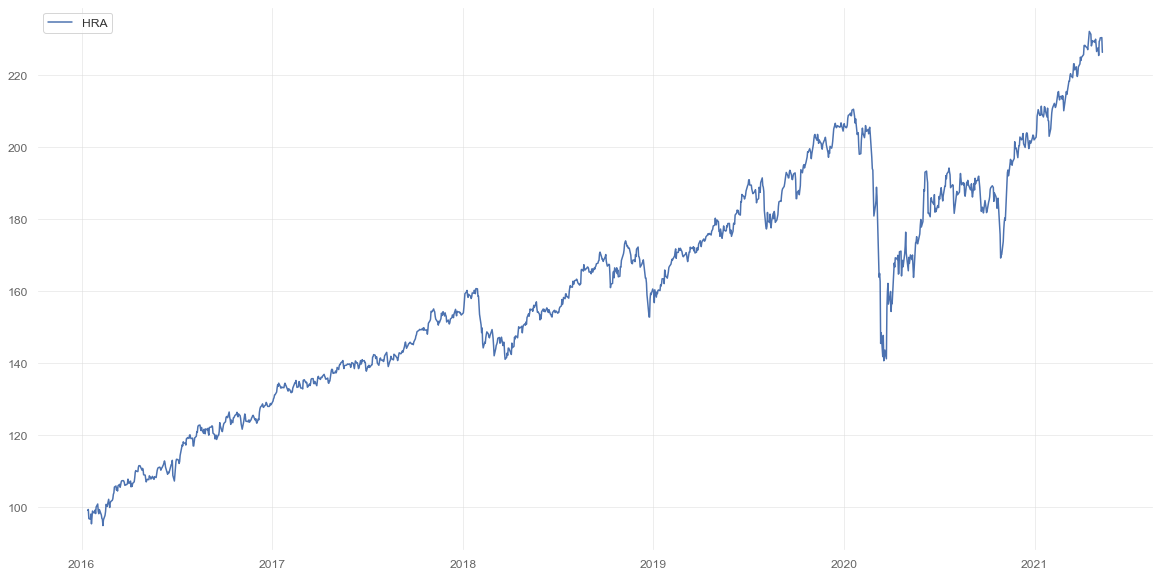

In [33]:
plt.figure(figsize=(20,10))
plt.plot(hra_cum_returns*100, label="HRA") # plotting by columns
plt.legend(loc="upper left")
plt.show()

In [34]:
hras = pd.read_csv("hras.csv")

In [35]:
hras = hras.rename({'Unnamed: 0': ''}, axis=1)  # new method
hras = hras.set_index('')
hras = hras.T
hras = hras.reindex(sorted(hras.columns), axis=1)
hras.index= hras.index.astype(int)

In [36]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hras.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break


port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()

hras_port_returns = pd.Series(port_returns)
hras_port_returns.index = dates[252-1:]
hras_cum_returns = pd.Series(cum_returns)
hras_cum_returns.index = dates[252-1:]

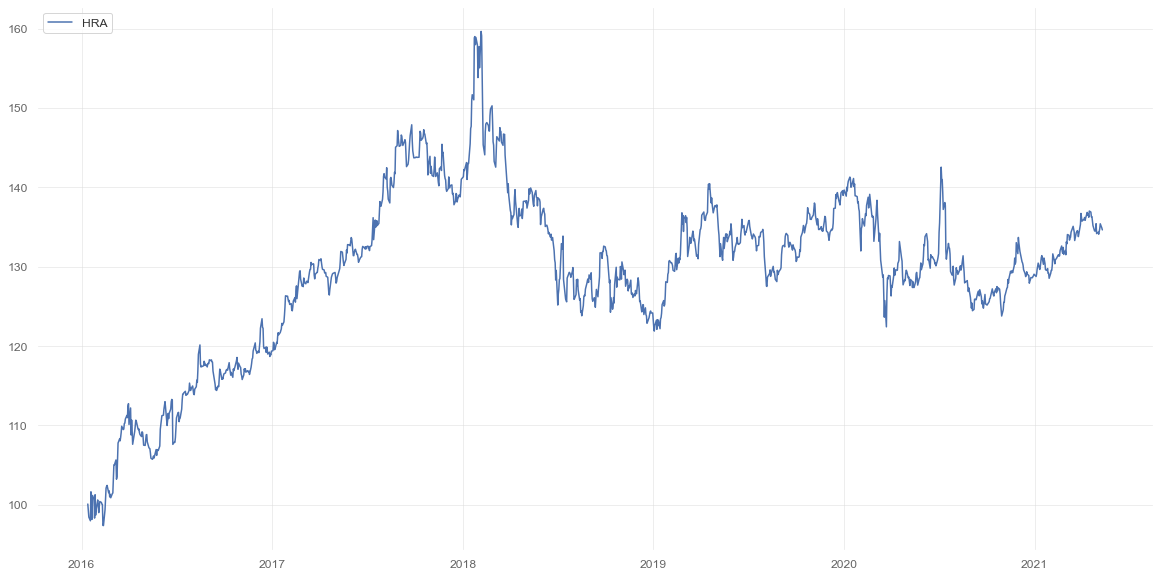

In [37]:
plt.figure(figsize=(20,10))
plt.plot(hras_cum_returns*100, label="HRA") # plotting by columns
plt.legend(loc="upper left")
plt.show()

In [38]:
hrac = pd.read_csv("hrac.csv")

In [39]:
hrac = hrac.rename({'Unnamed: 0': ''}, axis=1)  # new method
hrac = hrac.set_index('')
hrac = hrac.T
hrac = hrac.reindex(sorted(hrac.columns), axis=1)
hrac.index= hrac.index.astype(int)

In [40]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hrac.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break


port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()

hrac_port_returns = pd.Series(port_returns)
hrac_port_returns.index = dates[252-1:]
hrac_cum_returns = pd.Series(cum_returns)
hrac_cum_returns.index = dates[252-1:]

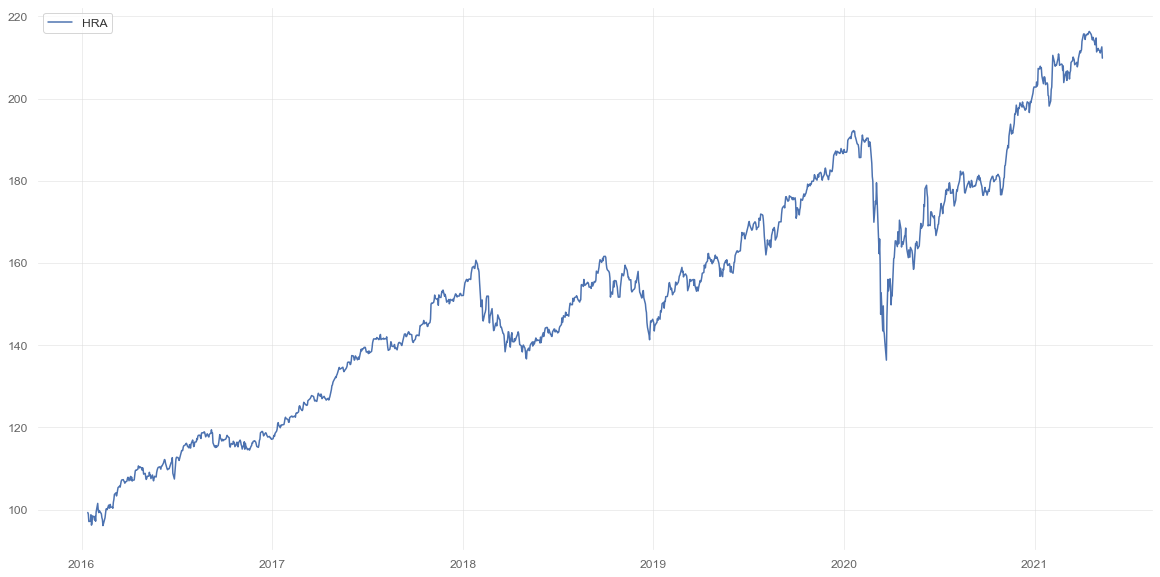

In [41]:
plt.figure(figsize=(20,10))
plt.plot(hrac_cum_returns*100, label="HRA") # plotting by columns
plt.legend(loc="upper left")
plt.show()

In [42]:
hraa = pd.read_csv("hraa.csv")

In [43]:
hraa = hraa.rename({'Unnamed: 0': ''}, axis=1)  # new method
hraa = hraa.set_index('')
hraa = hraa.T
hraa = hraa.reindex(sorted(hraa.columns), axis=1)
hraa.index= hraa.index.astype(int)

In [44]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hraa.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break


port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()

hraa_port_returns = pd.Series(port_returns)
hraa_port_returns.index = dates[252-1:]
hraa_cum_returns = pd.Series(cum_returns)
hraa_cum_returns.index = dates[252-1:]

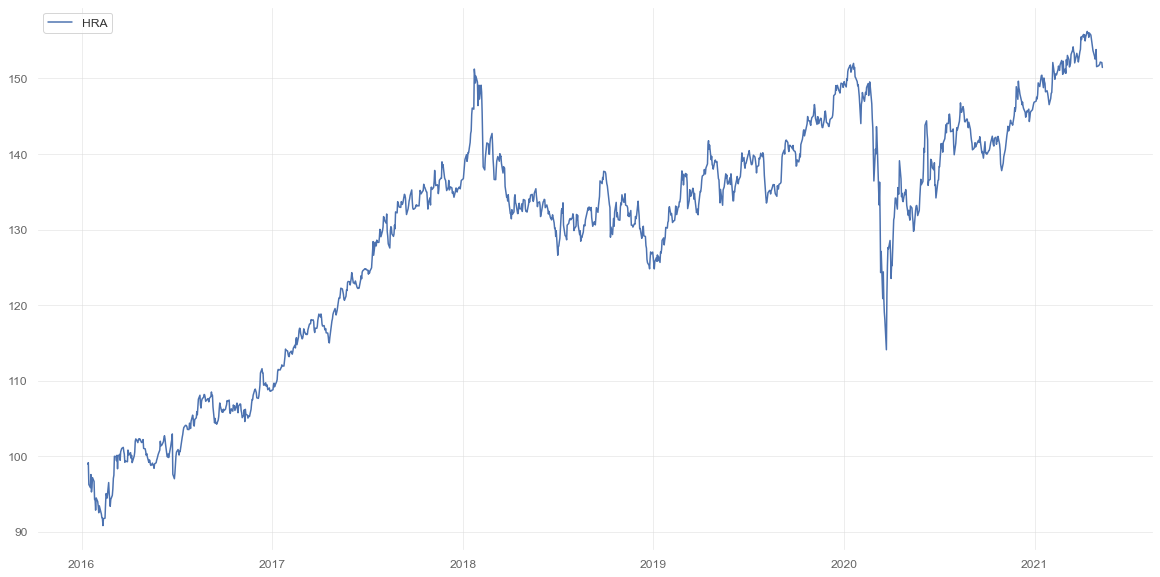

In [45]:
plt.figure(figsize=(20,10))
plt.plot(hraa_cum_returns*100, label="HRA") # plotting by columns
plt.legend(loc="upper left")
plt.show()

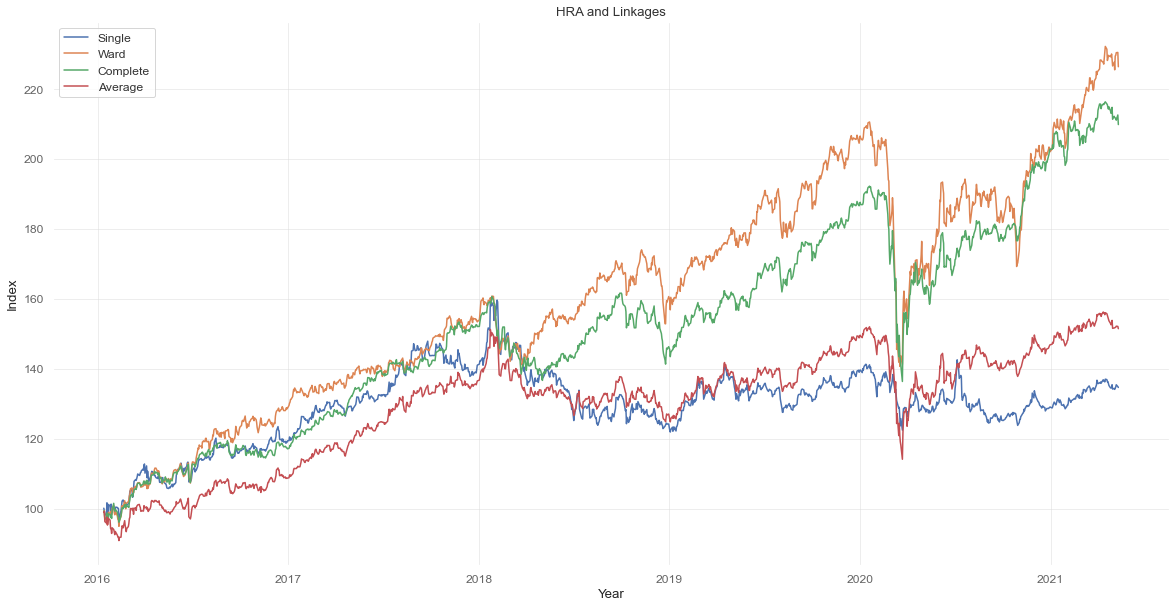

In [46]:
plt.figure(figsize=(20,10))
plt.plot(hras_cum_returns*100, label="Single") # plotting by columns
plt.plot(hra_cum_returns*100, label="Ward")
plt.plot(hrac_cum_returns*100, label="Complete")
plt.plot(hraa_cum_returns*100, label="Average")
plt.title("HRA and Linkages")
plt.ylabel("Index")
plt.xlabel("Year")
plt.legend(loc="upper left")
plt.show()

#### ERC

In [47]:
erc = pd.read_csv("erc.csv")

In [48]:
erc = erc.rename({'Unnamed: 0': ''}, axis=1)  # new method
erc = erc.set_index('')
erc = erc.T
erc = erc.reindex(sorted(erc.columns), axis=1)
erc.index= erc.index.astype(int)

In [49]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(erc.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break


port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()

erc_port_returns = pd.Series(port_returns)
erc_port_returns.index = dates[252-1:]
erc_cum_returns = pd.Series(cum_returns)
erc_cum_returns.index = dates[252-1:]

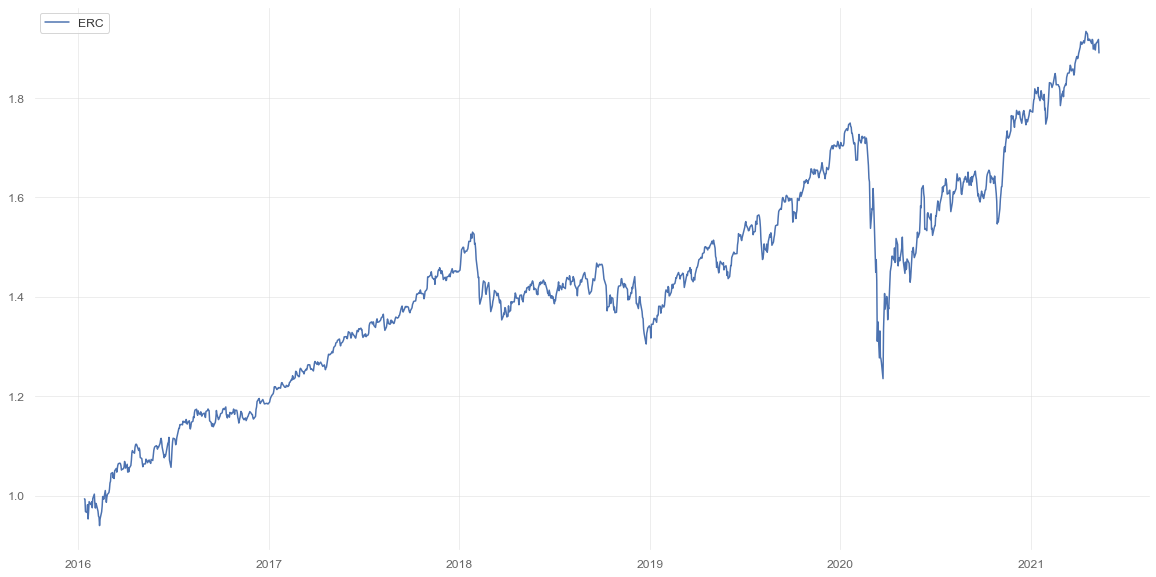

In [50]:
plt.figure(figsize=(20,10))
plt.plot(erc_cum_returns, label="ERC") # plotting by columns
plt.legend(loc="upper left")
plt.show()

#### MDP

In [51]:
mdp = pd.read_csv("md.csv")

In [52]:
mdp = mdp.rename({'Unnamed: 0': ''}, axis=1)  # new method
mdp = mdp.set_index('')
mdp = mdp.T
mdp = mdp.reindex(sorted(mdp.columns), axis=1)
mdp.index= mdp.index.astype(int)

In [53]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(mdp.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break


port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()

mdp_port_returns = pd.Series(port_returns)
mdp_port_returns.index = dates[252-1:]
mdp_cum_returns = pd.Series(cum_returns)
mdp_cum_returns.index = dates[252-1:]

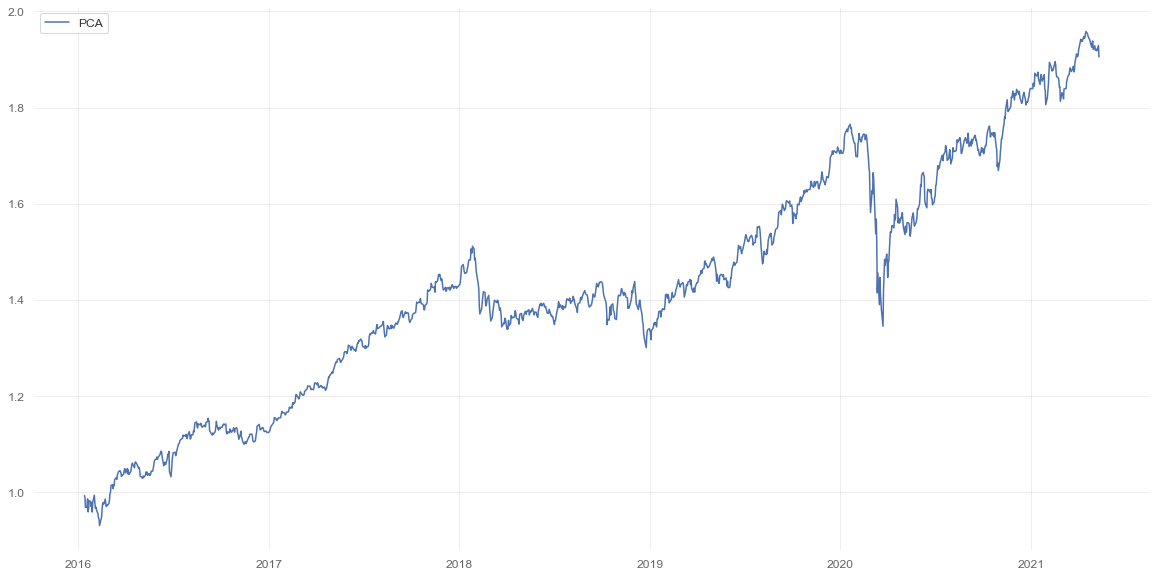

In [54]:
plt.figure(figsize=(20,10))
plt.plot(mdp_cum_returns, label="PCA") # plotting by columns
plt.legend(loc="upper left")
plt.show()

#### HCAA

In [55]:
hcaa = pd.read_csv("hcaa.csv")

In [56]:
hcaa = hcaa.rename({'Unnamed: 0': ''}, axis=1)  # new method
hcaa = hcaa.set_index('')
hcaa = hcaa.T
hcaa = hcaa.reindex(sorted(hcaa.columns), axis=1)
hcaa.index= hcaa.index.astype(int)

In [57]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hcaa.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hcaa_cum_returns = cum_returns
hcaa_port_returns = port_returns

hcaa_port_returns = pd.Series(hcaa_port_returns)
hcaa_port_returns.index = dates[252-1:]
hcaa_cum_returns = pd.Series(hcaa_cum_returns)
hcaa_cum_returns.index = dates[252-1:]

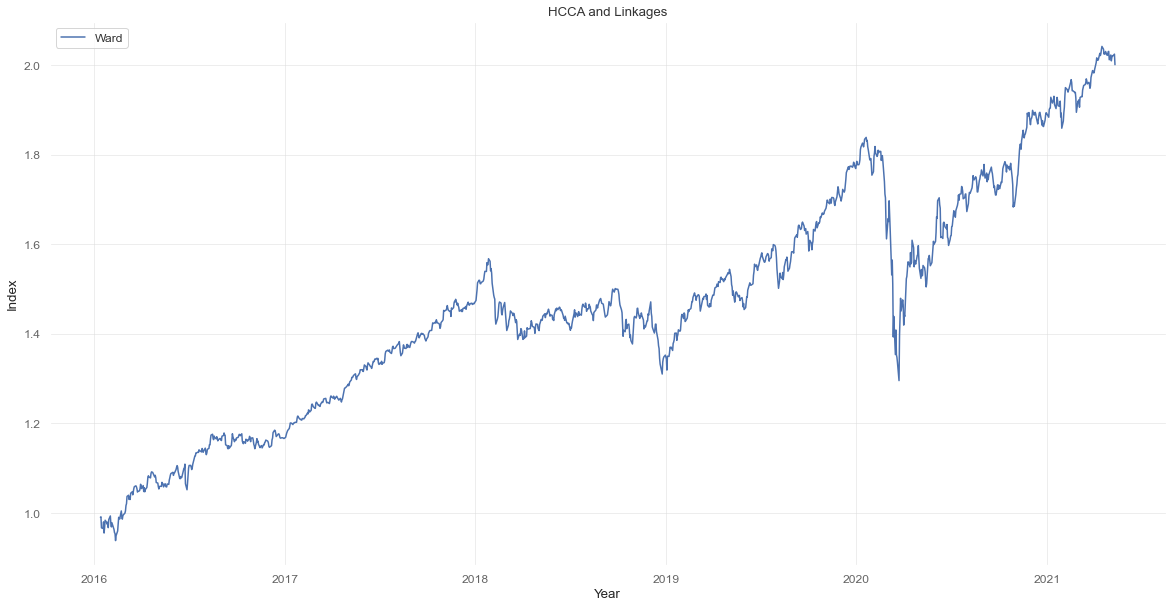

In [58]:
plt.figure(figsize=(20,10))
plt.plot(hcaa_cum_returns, label="Ward") # plotting by columns
plt.title("HCCA and Linkages")
plt.ylabel("Index")
plt.xlabel("Year")
plt.legend(loc="upper left")
plt.show()

#### average

In [59]:
hcaaa = pd.read_csv("hcaaa.csv")

In [60]:
hcaaa = hcaaa.rename({'Unnamed: 0': ''}, axis=1)  # new method
hcaaa = hcaaa.set_index('')
hcaaa = hcaaa.T

In [61]:
hcaaa = hcaaa.T

In [62]:
hcaaa = hcaaa.reindex(sorted(hcaaa.columns), axis=1)
#hcaaa.index= hcaaa.index.astype(int)

In [63]:
#cv_sliding = sliding_window(df, window_size=90, horizon=63)
sliding = sliding_window(df, window_size=0, horizon=63)

i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hcaaa.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hcaaa_cum_returns = cum_returns
hcaaa_port_returns = port_returns

hcaaa_port_returns = pd.Series(hcaaa_port_returns)
hcaaa_port_returns.index = dates[252-1:]
hcaaa_cum_returns = pd.Series(hcaaa_cum_returns)
hcaaa_cum_returns.index = dates[252-1:]

In [64]:
#qs.reports.full(hcaa_port_returns)

In [65]:
hcaac = pd.read_csv("hcaac.csv")

In [66]:
hcaac = hcaac.rename({'Unnamed: 0': ''}, axis=1)  # new method
hcaac = hcaac.set_index('')
hcaac = hcaac.T
hcaac = hcaac.reindex(sorted(hcaac.columns), axis=1)
hcaac.index= hcaac.index.astype(int)

In [67]:
cv_sliding = sliding_window(df, window_size=90, horizon=63)


i = 0
port_returns = []

for split_train, split_val in cv_sliding:
    try:
        split_val = split_val * list(hcaac.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hcaac_cum_returns = cum_returns
hcaac_port_returns = port_returns

hcaac_port_returns = pd.Series(hcaac_port_returns)
hcaac_port_returns.index = dates[252-1:]
hcaac_cum_returns = pd.Series(hcaac_cum_returns)
hcaac_cum_returns.index = dates[252-1:]

In [68]:
hcaas = pd.read_csv("hcaas.csv")

In [69]:
hcaas = hcaas.rename({'Unnamed: 0': ''}, axis=1)  # new method
hcaas = hcaas.set_index('')
hcaas = hcaas.T

In [70]:
hcaas = hcaas.reindex(sorted(hcaas.columns), axis=1)
hcaas.index= hcaas.index.astype(int)

In [71]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hcaas.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hcaas_cum_returns = cum_returns
hcaas_port_returns = port_returns

hcaas_port_returns = pd.Series(hcaas_port_returns)
hcaas_port_returns.index = dates[252-1:]
hcaas_cum_returns = pd.Series(hcaas_cum_returns)
hcaas_cum_returns.index = dates[252-1:]

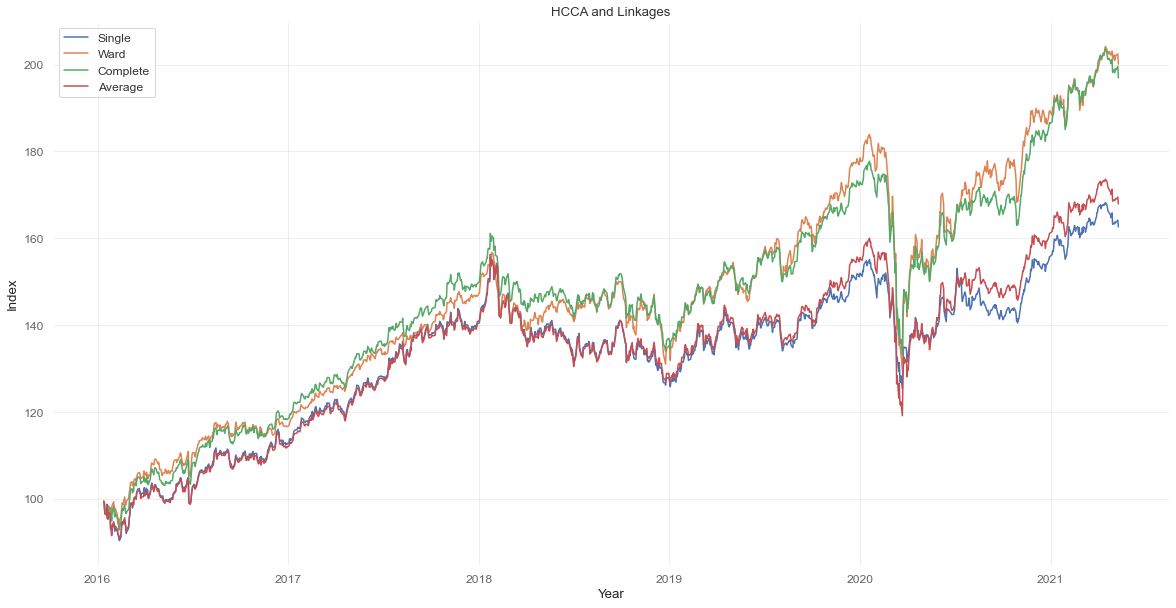

In [72]:
plt.figure(figsize=(20,10))
plt.plot(hcaas_cum_returns*100, label="Single") # plotting by columns
plt.plot(hcaa_cum_returns*100, label="Ward")
plt.plot(hcaac_cum_returns*100, label="Complete")
plt.plot(hcaaa_cum_returns*100, label="Average")
plt.title("HCCA and Linkages")
plt.ylabel("Index")
plt.xlabel("Year")
plt.legend(loc="upper left")
plt.show()

#### Equal-risk contribution

In [73]:
herc = pd.read_csv("herc.csv")

In [74]:
herc = herc.rename({'Unnamed: 0': ''}, axis=1)  # new method

In [75]:
herc = herc.set_index('')

In [76]:
herc = herc.T

In [77]:
herc = herc.reindex(sorted(herc.columns), axis=1)

In [78]:
herc.index = herc.index.astype(int)

In [79]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(herc.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
herc_cum_returns = cum_returns
herc_port_returns = port_returns

In [80]:
cum_returns = (port_returns+1).cumprod()

In [81]:
herc_port_returns = pd.Series(herc_port_returns)
herc_port_returns.index = dates[252-1:]
herc_cum_returns = pd.Series(herc_cum_returns)
herc_cum_returns.index = dates[252-1:]

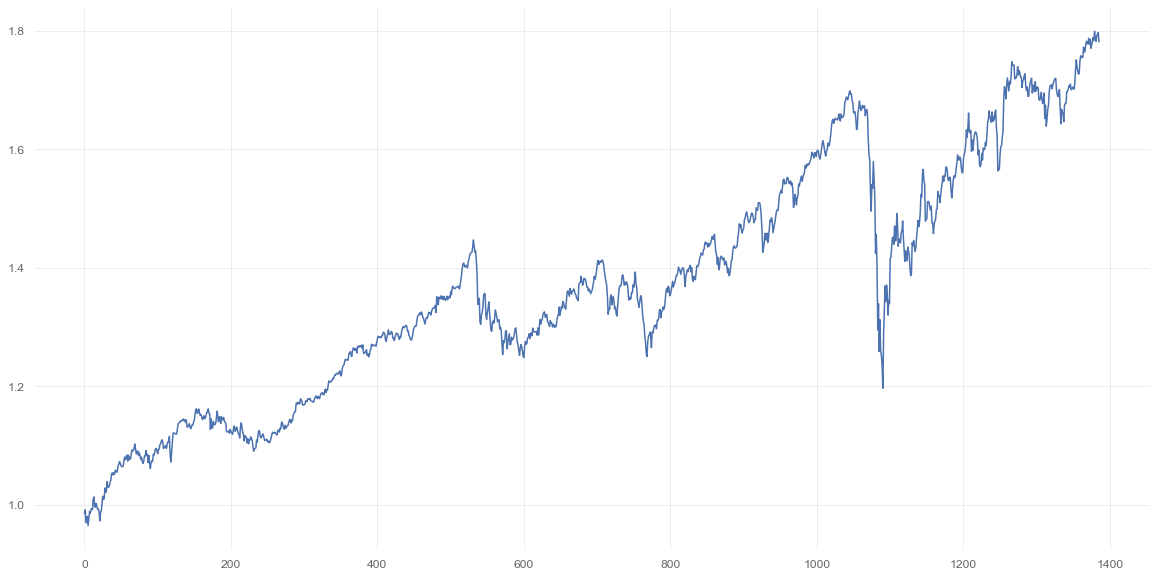

In [82]:
plt.figure(figsize=(20,10))
plt.plot(cum_returns) # plotting by columns
plt.show()

In [83]:
herca = pd.read_csv("herca.csv")

In [84]:
herca = herca.rename({'Unnamed: 0': ''}, axis=1)  # new method
herca = herca.set_index('')
herca = herca.T
herca = herca.reindex(sorted(hcaac.columns), axis=1)
herca.index= herca.index.astype(int)

In [85]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(herca.loc[i*63])
        port_ret = split_val.sum(axis=1)
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
herca_cum_returns = cum_returns
herca_port_returns = port_returns

In [86]:
herca_port_returns = pd.Series(herca_port_returns)
herca_port_returns.index = dates[252-1:]
herca_cum_returns = pd.Series(herca_cum_returns)
herca_cum_returns.index = dates[252-1:]

In [87]:
hercc = pd.read_csv("hercc.csv")

In [88]:
hercc = hercc.rename({'Unnamed: 0': ''}, axis=1)  # new method
hercc = hercc.set_index('')
hercc = hercc.T
hercc = hercc.reindex(sorted(hercc.columns), axis=1)
hercc.index= hercc.index.astype(int)

In [89]:
sliding = sliding_window(df, window_size=0, horizon=63)

i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(hercc.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hercc_cum_returns = cum_returns
hercc_port_returns = port_returns

In [90]:
hercc_port_returns = pd.Series(hercc_port_returns)
hercc_port_returns.index = dates[252-1:]
hercc_cum_returns = pd.Series(hercc_cum_returns)
hercc_cum_returns.index = dates[252-1:]

In [91]:
#qs.reports.full(herc_port_returns)

In [92]:
hercs = pd.read_csv("hercs.csv")

In [93]:
hercs = hercs.rename({'Unnamed: 0': ''}, axis=1)  # new method
hercs = hercs.set_index('')
hercs = hercs.T
hercs = hercs.reindex(sorted(hercs.columns), axis=1)
hercs.index= hercs.index.astype(int)

In [94]:
cv_sliding = sliding_window(df, window_size=90, horizon=63)


i = 0
port_returns = []

for split_train, split_val in cv_sliding:
    try:
        split_val = split_val * list(hercs.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hercs_cum_returns = cum_returns
hercs_port_returns = port_returns

In [95]:
hercs_port_returns = pd.Series(hercs_port_returns)
hercs_port_returns.index = dates[252-1:]
hercs_cum_returns = pd.Series(hercs_cum_returns)
hercs_cum_returns.index = dates[252-1:]

In [96]:
#qs.reports.full(herc_port_returns)

In [97]:
herca = pd.read_csv("herca.csv")

In [98]:
herca = herca.rename({'Unnamed: 0': ''}, axis=1)  # new method
herca = herca.set_index('')
herca = herca.T
herca = herca.reindex(sorted(herca.columns), axis=1)
herca.index= herca.index.astype(int)

In [99]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(herca.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
herca_cum_returns = cum_returns
herca_port_returns = port_returns

In [100]:
herca_port_returns = pd.Series(herca_port_returns)
herca_port_returns.index = dates[252-1:]
herca_cum_returns = pd.Series(herca_cum_returns)
herca_cum_returns.index = dates[252-1:]

# Equally-weighted portfolio

In [101]:
ew = pd.read_csv("ew.csv")

In [102]:
ew

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385
0,Samsung,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
1,BankChina,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
2,Sony,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
3,Alibaba,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
4,BASF,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
5,BHPB,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
6,CocaCola,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
7,Medtronic,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
8,PG,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
9,Shell,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824


In [103]:
ew = ew.rename({'Unnamed: 0': ''}, axis=1)  # new method

In [104]:
ew = ew.set_index('')

In [105]:
ew = ew.T

In [106]:
ew = ew.reindex(sorted(df.columns), axis=1)
#ew.columns = ew.columns+"W"

In [107]:
ew.reset_index(inplace=True)
ew.drop(columns="index", inplace=True)

In [108]:
ew

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
0,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
1,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
2,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
3,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
4,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
1382,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
1383,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
1384,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824


In [109]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for split_train, split_val in sliding:
    try:
        split_val = split_val * list(ew.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
ew_cum_returns = cum_returns
ew_port_returns = port_returns

In [110]:
ew_port_returns = pd.Series(ew_port_returns)
ew_port_returns.index = dates[252-1:]
ew_cum_returns = pd.Series(ew_cum_returns)
ew_cum_returns.index = dates[252-1:]

In [111]:
# ew_results = qs.reports.full(ew_port_returns)
# #ew_results

# IV

In [112]:
ivp = pd.read_csv("ivp.csv")

In [113]:
ivp

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385
0,Alibaba,0.049610,0.048618,0.048806,0.048907,0.048662,0.048245,0.047820,0.047882,0.048080,...,0.046306,0.046331,0.044992,0.044990,0.044989,0.044782,0.044800,0.044786,0.044789,0.044642
1,BASF,0.063250,0.063410,0.063395,0.063386,0.063403,0.063433,0.063462,0.063471,0.063440,...,0.062111,0.062108,0.062188,0.062186,0.062185,0.062199,0.062197,0.062193,0.062201,0.062222
2,BHPB,0.033183,0.033253,0.033203,0.033201,0.033210,0.033226,0.033229,0.033236,0.033244,...,0.032485,0.032487,0.032534,0.032533,0.032532,0.032535,0.032535,0.032536,0.032517,0.032528
3,BankChina,0.054796,0.054948,0.054955,0.054944,0.054974,0.055015,0.055055,0.055072,0.055096,...,0.070296,0.070308,0.070419,0.070436,0.070455,0.070482,0.070492,0.070507,0.070535,0.070572
4,CocaCola,0.099699,0.099930,0.099911,0.099895,0.099921,0.099960,0.099988,0.100007,0.100020,...,0.099578,0.099577,0.099717,0.099713,0.099712,0.099735,0.099730,0.099734,0.099654,0.099682
5,Medtronic,0.060797,0.060940,0.060929,0.060921,0.060928,0.060949,0.060979,0.060989,0.061002,...,0.061552,0.061552,0.061640,0.061638,0.061637,0.061651,0.061650,0.061650,0.061663,0.061684
6,PG,0.096300,0.096506,0.096488,0.096477,0.096500,0.096516,0.096558,0.096578,0.096598,...,0.096550,0.096551,0.096683,0.096680,0.096678,0.096700,0.096697,0.096697,0.096716,0.096749
7,RTX,0.074673,0.074856,0.074841,0.074828,0.074846,0.074879,0.074908,0.074922,0.074910,...,0.067969,0.067957,0.068052,0.068050,0.068049,0.068064,0.068056,0.068061,0.068015,0.068033
8,SAP,0.032240,0.032322,0.032316,0.032313,0.032322,0.032339,0.032353,0.032361,0.032362,...,0.035113,0.035115,0.035160,0.035159,0.035158,0.035165,0.035165,0.035163,0.035167,0.035180
9,Samsung,0.032805,0.032886,0.032878,0.032871,0.032879,0.032894,0.032905,0.032912,0.032912,...,0.034398,0.034395,0.034424,0.034422,0.034422,0.034429,0.034420,0.034417,0.034421,0.034433


In [114]:
ivp = ivp.rename({'Unnamed: 0': ''}, axis=1)  # new method
ivp = ivp.set_index('')
ivp = ivp.T
ivp = ivp.reindex(sorted(df.columns), axis=1)
ivp.reset_index(inplace=True)
ivp.drop(columns="index", inplace=True)
ivp_90 = ivp[::63]
ivp_90

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
0,0.049610,0.063250,0.033183,0.054796,0.099699,0.060797,0.096300,0.074673,0.032240,0.032805,0.059411,0.043314,0.092832,0.046700,0.038674,0.047399,0.074319
63,0.044784,0.063712,0.033366,0.055558,0.100916,0.061479,0.097442,0.075461,0.032739,0.033150,0.059723,0.043679,0.092898,0.044960,0.037428,0.047940,0.074767
126,0.044123,0.064244,0.032772,0.056354,0.102222,0.062180,0.098575,0.076115,0.033197,0.033589,0.060232,0.043908,0.091029,0.040002,0.037481,0.048441,0.075537
189,0.045863,0.064099,0.032199,0.057178,0.102215,0.062331,0.098777,0.076286,0.033342,0.033633,0.060091,0.043878,0.090312,0.038879,0.037239,0.048516,0.075160
252,0.046637,0.063773,0.032021,0.057692,0.102182,0.062344,0.098849,0.076287,0.033376,0.033567,0.059983,0.043592,0.089622,0.039583,0.036817,0.048404,0.075269
315,0.048566,0.063649,0.031784,0.058357,0.101828,0.061892,0.098345,0.076056,0.033395,0.033309,0.059784,0.043469,0.088814,0.040668,0.036748,0.048311,0.075026
378,0.050389,0.063443,0.031644,0.058745,0.101330,0.061647,0.097845,0.075771,0.033397,0.033148,0.059506,0.043337,0.088300,0.042136,0.036550,0.048123,0.074690
441,0.053162,0.063057,0.031373,0.059221,0.100933,0.061377,0.097413,0.075447,0.033315,0.032932,0.059174,0.043033,0.087667,0.043338,0.036378,0.047874,0.074307
504,0.051680,0.062983,0.031393,0.059638,0.100930,0.061351,0.097407,0.075420,0.033364,0.032863,0.059101,0.042970,0.087549,0.045015,0.036383,0.047826,0.074128
567,0.052415,0.062935,0.031380,0.060024,0.100892,0.061171,0.097242,0.075286,0.033418,0.032749,0.059063,0.042961,0.087477,0.044872,0.036365,0.047789,0.073960


In [115]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for cv_train,cv_val in sliding:
    try:
        cv_val = cv_val * list(ivp.loc[i*63])
        port_ret = cv_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
ivp_cum_returns = cum_returns
ivp_port_returns = port_returns

In [116]:
ivp_port_returns = pd.Series(ivp_port_returns)
ivp_port_returns.index = dates[252-1:]
ivp_cum_returns = pd.Series(ivp_cum_returns)
ivp_cum_returns.index = dates[252-1:]

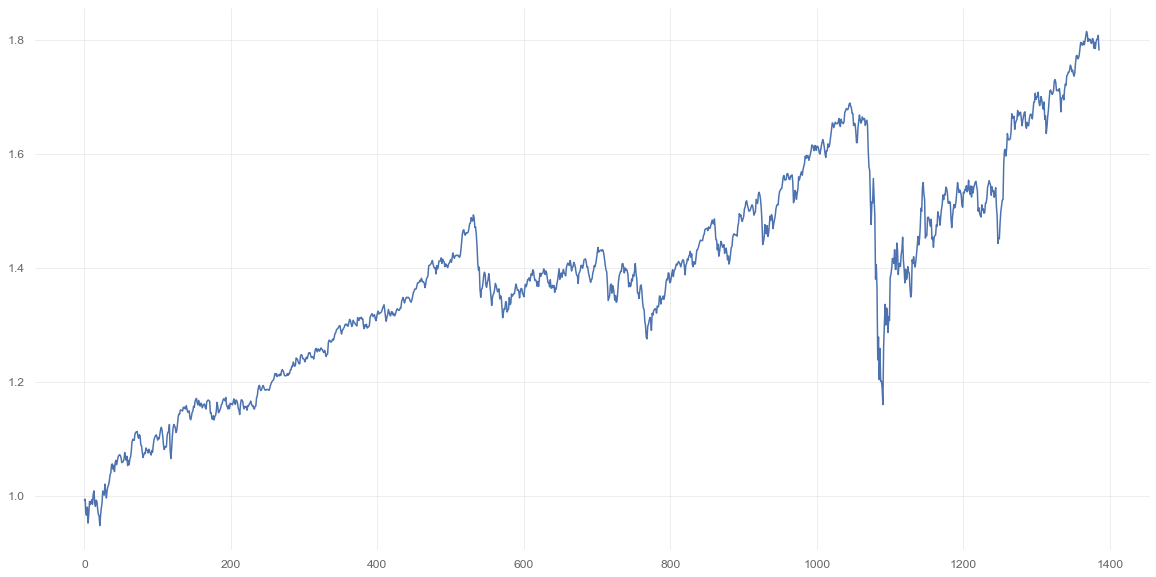

In [117]:
plt.figure(figsize=(20,10))
plt.plot(cum_returns) # plotting by columns
plt.show()

In [118]:
# iv_results = qs.reports.full(iv_port_returns)
# iv_results

### MVP

In [119]:
mvp = pd.read_csv("mvp.csv")

In [120]:
mvp = mvp.rename({'Unnamed: 0': ''}, axis=1)  # new method
mvp = mvp.set_index('')
mvp = mvp.T
mvp = mvp.reindex(sorted(df.columns), axis=1)
mvp.reset_index(inplace=True)
mvp.drop(columns="index", inplace=True)
mvp_90 = mvp[::63]
mvp_90

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
0,0.063042,0.009760,0.001712,0.131704,0.142395,0.036093,0.142873,0.021795,0.011578,0.066794,0.039691,0.006534,0.118070,0.076551,0.008085,0.035942,0.087381
63,0.038485,0.011123,0.001853,0.135543,0.143769,0.040604,0.149683,0.022569,0.012241,0.068482,0.037581,0.006553,0.126535,0.069521,0.008085,0.037471,0.089902
126,0.015152,0.013017,0.001794,0.139078,0.148736,0.045742,0.158103,0.024674,0.012593,0.072620,0.043988,0.006464,0.128913,0.047515,0.008713,0.038389,0.094508
189,0.023871,0.012457,0.001524,0.140171,0.148921,0.043610,0.158215,0.023813,0.012639,0.071573,0.042950,0.006058,0.120614,0.052169,0.007560,0.038512,0.095343
252,0.023849,0.011624,0.001588,0.140533,0.149525,0.044488,0.158276,0.023761,0.012346,0.072440,0.043905,0.005580,0.121814,0.046608,0.007006,0.039560,0.097096
315,0.026931,0.011483,0.001537,0.141520,0.147178,0.043402,0.157224,0.023263,0.012194,0.069697,0.045003,0.005372,0.117744,0.053937,0.006701,0.039475,0.097339
378,0.037207,0.011334,0.001462,0.141393,0.145070,0.041858,0.154888,0.022486,0.012100,0.068530,0.043698,0.005202,0.114070,0.059184,0.006188,0.038649,0.096681
441,0.049664,0.010872,0.001349,0.141602,0.143608,0.040333,0.152493,0.021910,0.011964,0.067247,0.042141,0.004861,0.109230,0.063153,0.005686,0.037658,0.096227
504,0.057694,0.010451,0.001286,0.141707,0.141830,0.038988,0.151017,0.021984,0.011633,0.065835,0.040242,0.004584,0.106586,0.067549,0.005501,0.038467,0.094644
567,0.065092,0.010248,0.001237,0.142748,0.140310,0.039904,0.148807,0.021875,0.011569,0.064150,0.040792,0.004462,0.104829,0.067615,0.005440,0.037370,0.093553


In [121]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for cv_train,cv_val in sliding:
    try:
        cv_val = cv_val * list(mvp.loc[i*63])
        port_ret = cv_val.sum(axis=1)
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
mvp_cum_returns = cum_returns
mvp_port_returns = port_returns

In [122]:
mvp_port_returns = pd.Series(mvp_port_returns)
mvp_port_returns.index = dates[252-1:]
mvp_cum_returns = pd.Series(mvp_cum_returns)
mvp_cum_returns.index = dates[252-1:]

In [123]:
#mvp_results = qs.reports.full(mvp_port_returns)
#mvp_results

### HRP

In [124]:
hrpa = pd.read_csv("hrpa.csv")

In [125]:
hrpa = hrpa.rename({'Unnamed: 0': ''}, axis=1)  # new method
hrpa = hrpa.set_index('')
hrpa = hrpa.T
hrpa = hrpa.reindex(sorted(df.columns), axis=1)
hrpa.reset_index(inplace=True)
hrpa.drop(columns="index", inplace=True)
hrpa_90 = hrpa[::63]
hrpa_90

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
0,0.050418,0.044467,0.016223,0.087091,0.093483,0.061983,0.090296,0.076131,0.032764,0.052140,0.052911,0.030875,0.045385,0.075800,0.027189,0.042213,0.120630
63,0.044466,0.045122,0.016284,0.088939,0.095168,0.063096,0.091893,0.077446,0.032506,0.053068,0.051881,0.031135,0.045339,0.073415,0.026507,0.041645,0.122088
126,0.033094,0.057683,0.026857,0.081047,0.089164,0.057660,0.085983,0.057089,0.047589,0.048307,0.058791,0.035982,0.099723,0.057345,0.033653,0.047282,0.082752
189,0.034101,0.057114,0.026328,0.082157,0.089463,0.046345,0.086454,0.070652,0.047742,0.048327,0.058247,0.035877,0.098958,0.055670,0.033181,0.047028,0.082355
252,0.035813,0.056660,0.026354,0.082154,0.089788,0.058658,0.086860,0.058580,0.046656,0.047800,0.058079,0.035876,0.098820,0.055332,0.032711,0.046868,0.082993
315,0.036248,0.056665,0.026224,0.082751,0.089207,0.046194,0.086156,0.071055,0.046752,0.047232,0.058005,0.035865,0.098184,0.056933,0.032716,0.046874,0.082941
378,0.038216,0.056227,0.026089,0.083116,0.088602,0.046754,0.085555,0.071014,0.046647,0.046900,0.057480,0.035730,0.097482,0.058852,0.032393,0.046485,0.082457
441,0.040872,0.055616,0.025822,0.083600,0.088313,0.047188,0.085233,0.071034,0.046442,0.046490,0.056903,0.035420,0.096628,0.060414,0.032086,0.046037,0.081903
504,0.040310,0.055245,0.025774,0.083743,0.088288,0.047853,0.085206,0.071478,0.046329,0.046145,0.056530,0.035279,0.096202,0.062507,0.031913,0.045745,0.081454
567,0.052515,0.042974,0.014658,0.093938,0.094373,0.062405,0.090959,0.076805,0.033481,0.051253,0.052082,0.029548,0.040860,0.074456,0.024831,0.042140,0.122722


In [126]:
sliding = sliding_window(df, window_size=0, horizon=63)

port_returns = []
i=0

for split_train,split_val in sliding:
    try:
        split_val = split_val * list(hrpa.loc[i*63])
        port_ret = split_val.sum(axis=1)
        #print(port_ret)
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hrpa_cum_returns = cum_returns
hrpa_port_returns = port_returns

In [127]:
hrpa_port_returns = pd.Series(hrpa_port_returns)
hrpa_port_returns.index = dates[252-1:]

In [128]:
hrpa_cum_returns = pd.Series(hrpa_cum_returns)
hrpa_cum_returns.index = dates[252-1:]

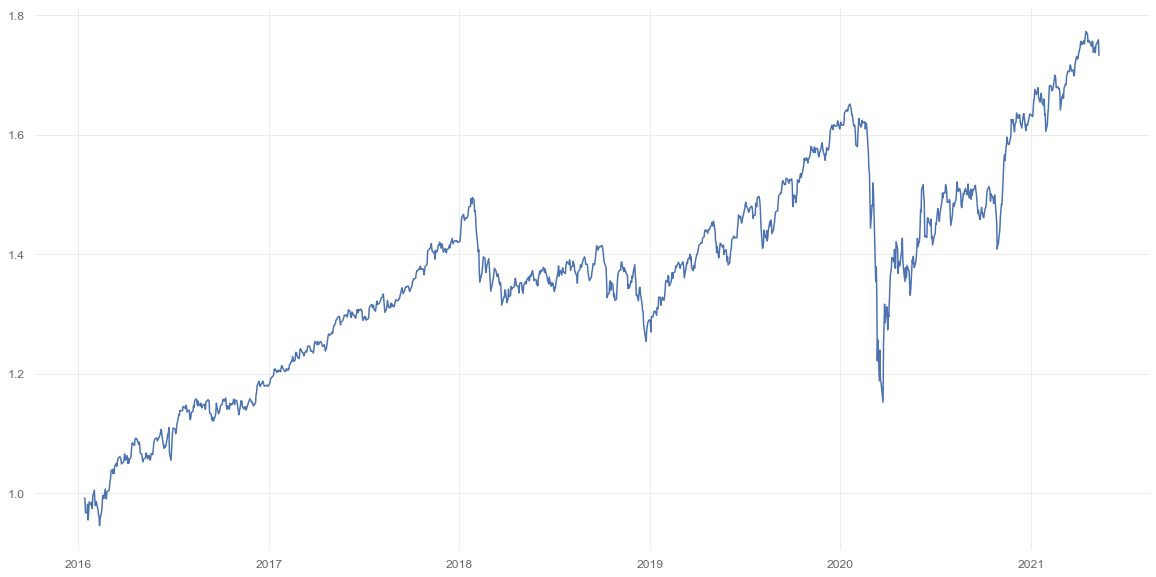

In [129]:
plt.figure(figsize=(20,10))
plt.plot(hrpa_cum_returns) # plotting by columns
plt.show()

In [130]:
# hrpa_results = qs.reports.full(hrpa_port_returns)
# hrpa_results

In [131]:
hrpw = pd.read_csv("hrpw.csv")

In [132]:
hrpw = hrpw.rename({'Unnamed: 0': ''}, axis=1)  # new method
hrpw = hrpw.set_index('')
hrpw = hrpw.T
hrpw = hrpw.reindex(sorted(df.columns), axis=1)
hrpw.reset_index(inplace=True)
hrpw.drop(columns="index", inplace=True)

In [133]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for cv_train,cv_val in sliding:
    try:
        cv_val = cv_val * list(hrpw.loc[i*63])
        #print(cv_val)
        port_ret = cv_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hrpw_cum_returns = cum_returns
hrpw_port_returns = port_returns

In [134]:
hrpw_port_returns = pd.Series(hrpw_port_returns)
hrpw_port_returns.index = dates[252-1:]

hrpw_cum_returns = pd.Series(hrpw_cum_returns)
hrpw_cum_returns.index = dates[252-1:]

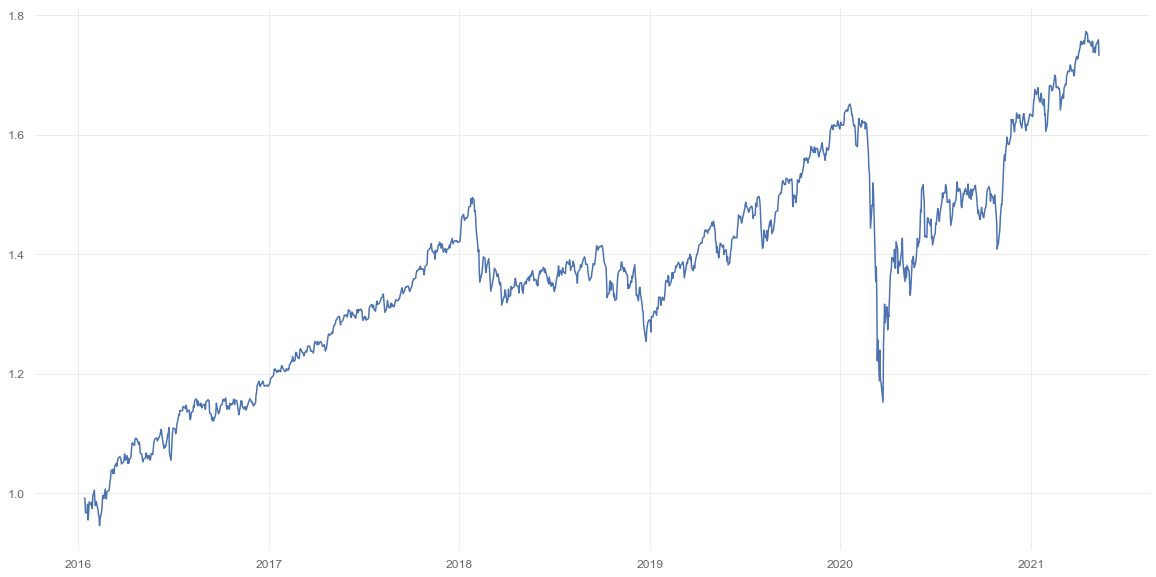

In [135]:
plt.figure(figsize=(20,10))
plt.plot(hrpa_cum_returns) # plotting by columns
plt.show()

In [136]:
# hrpw_results = qs.reports.full(hrpw_port_returns)
# hrpw_results

In [137]:
hrps = pd.read_csv("hrps.csv")

In [138]:
hrps = hrps.rename({'Unnamed: 0': ''}, axis=1)  # new method
hrps = hrps.set_index('')
hrps = hrps.T
hrps = hrps.reindex(sorted(df.columns), axis=1)
hrps.reset_index(inplace=True)
hrps.drop(columns="index", inplace=True)
hrps_90 = hrps[::63]
hrps_90

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
0,0.046434,0.042368,0.028139,0.087091,0.093483,0.061983,0.090296,0.076131,0.017473,0.052140,0.055607,0.031757,0.062183,0.075800,0.032796,0.025689,0.120630
63,0.054292,0.045288,0.024473,0.081085,0.094954,0.076496,0.091686,0.093893,0.025894,0.043354,0.050435,0.031049,0.068137,0.058799,0.031607,0.037917,0.090641
126,0.042999,0.046875,0.028869,0.079256,0.102071,0.060596,0.098430,0.084663,0.026939,0.032689,0.061589,0.032037,0.080186,0.038931,0.038325,0.039309,0.106236
189,0.046033,0.046556,0.028236,0.080384,0.101940,0.069200,0.098511,0.076568,0.026948,0.032694,0.061239,0.031869,0.079198,0.037793,0.037951,0.039212,0.105665
252,0.045840,0.046110,0.028226,0.081442,0.102270,0.061278,0.098934,0.083990,0.026910,0.032214,0.061346,0.031518,0.079000,0.037987,0.037654,0.039026,0.106255
315,0.048656,0.046141,0.027953,0.082255,0.101686,0.068378,0.098208,0.076197,0.026999,0.031739,0.061070,0.031512,0.078107,0.038752,0.037538,0.039059,0.105750
378,0.057610,0.044934,0.025242,0.069393,0.092716,0.077139,0.089528,0.086630,0.033159,0.035884,0.059082,0.049396,0.062539,0.045614,0.029155,0.056847,0.085132
441,0.061076,0.044499,0.024931,0.069702,0.092105,0.076959,0.088893,0.086679,0.032951,0.035905,0.058527,0.048923,0.061866,0.047251,0.028909,0.056347,0.084479
504,0.060373,0.044231,0.024828,0.069923,0.091750,0.077232,0.088547,0.088107,0.032831,0.035874,0.058155,0.048687,0.061483,0.049139,0.028775,0.056074,0.083990
567,0.060808,0.044016,0.024741,0.070140,0.107030,0.062374,0.099154,0.088325,0.032759,0.033230,0.057900,0.049840,0.061180,0.045530,0.028671,0.055843,0.078459


In [139]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for cv_train,cv_val in sliding:
    try:
        cv_val = cv_val * list(hrps.loc[i*63])
        port_ret = cv_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hrps_cum_returns = cum_returns
hrps_port_returns = port_returns

In [140]:
hrps_port_returns = pd.Series(hrps_port_returns)
hrps_port_returns.index = dates[252-1:]

hrps_cum_returns = pd.Series(hrps_cum_returns)
hrps_cum_returns.index = dates[252-1:]

In [141]:
# hrps_results = qs.reports.full(hrps_port_returns)
# hrps_results

In [142]:
hrpc = pd.read_csv("hrpc.csv")

In [143]:
hrpc = hrpc.rename({'Unnamed: 0': ''}, axis=1)  # new method
hrpc = hrpc.set_index('')
hrpc = hrpc.T
hrpc = hrpc.reindex(sorted(df.columns), axis=1)
hrpc.reset_index(inplace=True)
hrpc.drop(columns="index", inplace=True)
hrpc_90 = hrpc[::63]
hrpc_90

,Alibaba,BASF,BHPB,BankChina,CocaCola,Medtronic,PG,RTX,SAP,Samsung,Sanofi,Schneider,Shell,Sony,VW,Vodafone,Walmart
0,0.043980,0.046385,0.024548,0.087091,0.093483,0.061983,0.090296,0.076131,0.018700,0.052140,0.046619,0.031764,0.068674,0.075800,0.034285,0.027493,0.120630
63,0.047383,0.047211,0.025494,0.077320,0.091523,0.049285,0.088373,0.060493,0.034961,0.046135,0.063776,0.032367,0.070980,0.063398,0.052777,0.058027,0.090499
126,0.034712,0.048490,0.025282,0.078764,0.093524,0.060479,0.090188,0.059881,0.035859,0.046946,0.065062,0.033141,0.070223,0.054362,0.050936,0.059449,0.092703
189,0.035876,0.048025,0.024636,0.079857,0.094121,0.048758,0.090956,0.074331,0.035991,0.046974,0.064865,0.032875,0.069099,0.051897,0.049708,0.059639,0.092392
252,0.037667,0.047835,0.024588,0.080052,0.094437,0.061695,0.091357,0.061613,0.036186,0.046577,0.065033,0.032698,0.068816,0.051080,0.047511,0.059826,0.093029
315,0.038150,0.047849,0.024460,0.080659,0.093888,0.048618,0.090676,0.074784,0.036265,0.046038,0.064922,0.032678,0.068348,0.052496,0.047436,0.059826,0.092907
378,0.040203,0.047505,0.024288,0.081117,0.093209,0.049185,0.090003,0.074706,0.036168,0.045772,0.064444,0.032450,0.067774,0.054394,0.047183,0.059402,0.092195
441,0.042997,0.046975,0.023973,0.081547,0.092904,0.049642,0.089664,0.074727,0.035987,0.045348,0.063920,0.032058,0.066988,0.055859,0.046888,0.058979,0.091544
504,0.042396,0.046658,0.023848,0.081666,0.092857,0.050330,0.089616,0.075177,0.035909,0.045001,0.063608,0.031832,0.066509,0.057929,0.046821,0.058763,0.091080
567,0.045353,0.045722,0.022892,0.093938,0.094373,0.062405,0.090959,0.076805,0.019207,0.051253,0.045959,0.031211,0.063813,0.074456,0.031466,0.027467,0.122722


In [144]:
sliding = sliding_window(df, window_size=0, horizon=63)


i = 0
port_returns = []

for cv_train,cv_val in sliding:
    try:
        cv_val = cv_val * list(hrpc.loc[i*63])
        #print(cv_val)
        port_ret = cv_val.sum(axis=1)
        #cum_ret = (port_ret+1).cumprod()
        port_returns.append(port_ret.values)
        i+=1
              
    except KeyError:
        break

port_returns = np.concatenate(port_returns, axis=0)
cum_returns = (port_returns+1).cumprod()
hrpc_cum_returns = cum_returns
hrpc_port_returns = port_returns

In [145]:
hrpc_port_returns = pd.Series(hrpc_port_returns)
hrpc_port_returns.index = dates[252-1:]

hrpc_cum_returns = pd.Series(hrpc_cum_returns)
hrpc_cum_returns.index = dates[252-1:]

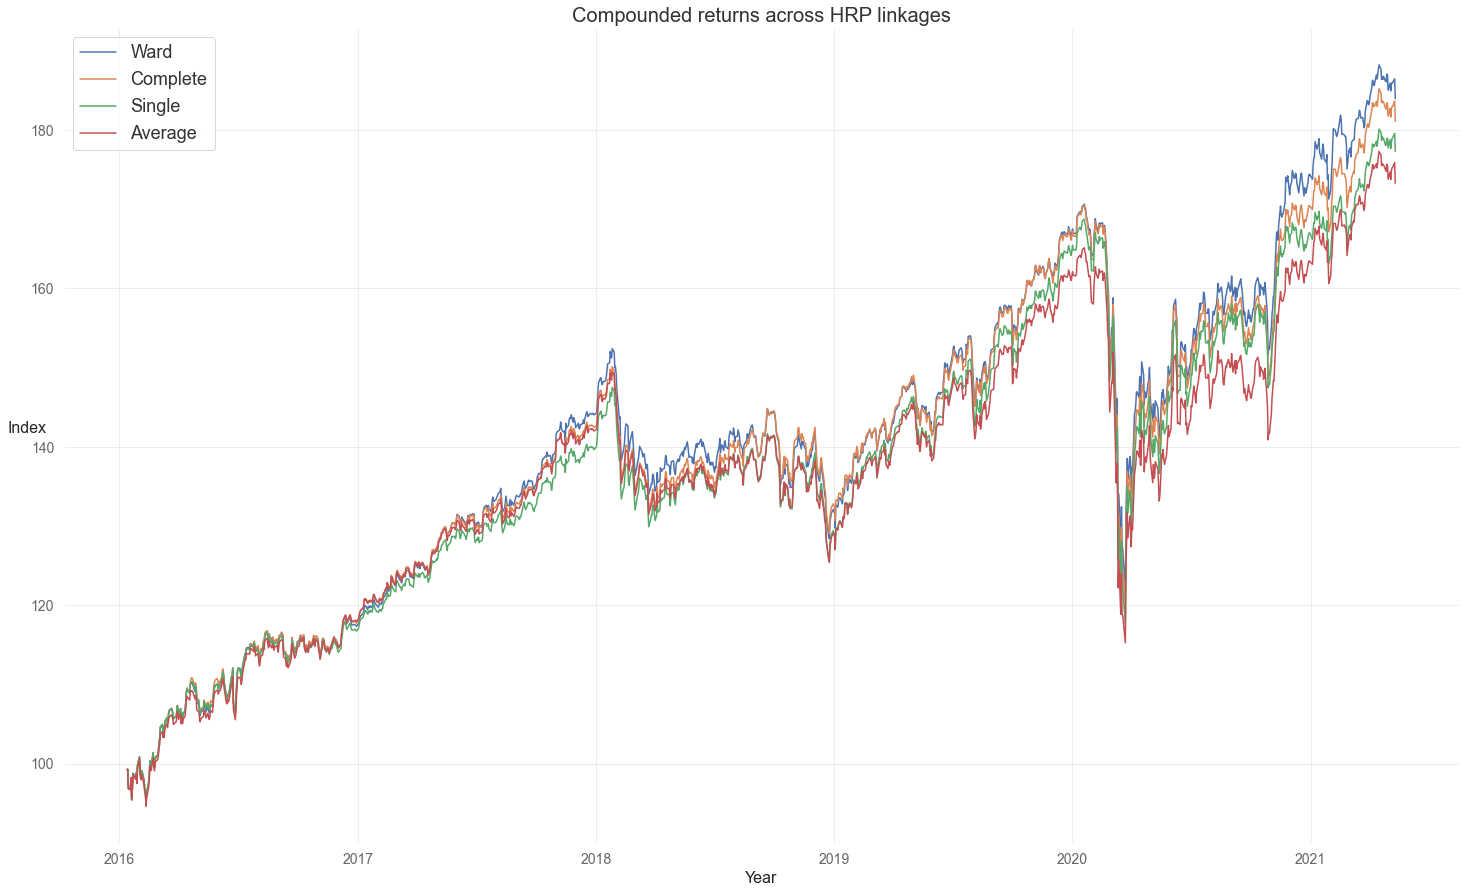

In [146]:
plt.figure(figsize=(25,15))
plt.plot(hrpw_cum_returns*100, label="Ward") # plotting by columns
plt.plot(hrpc_cum_returns*100, label="Complete")
plt.plot(hrps_cum_returns*100, label="Single")
plt.plot(hrpa_cum_returns*100, label="Average")


plt.title("Compounded returns across HRP linkages", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=16).set_rotation(0)
plt.xlabel("Year", fontsize=16)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

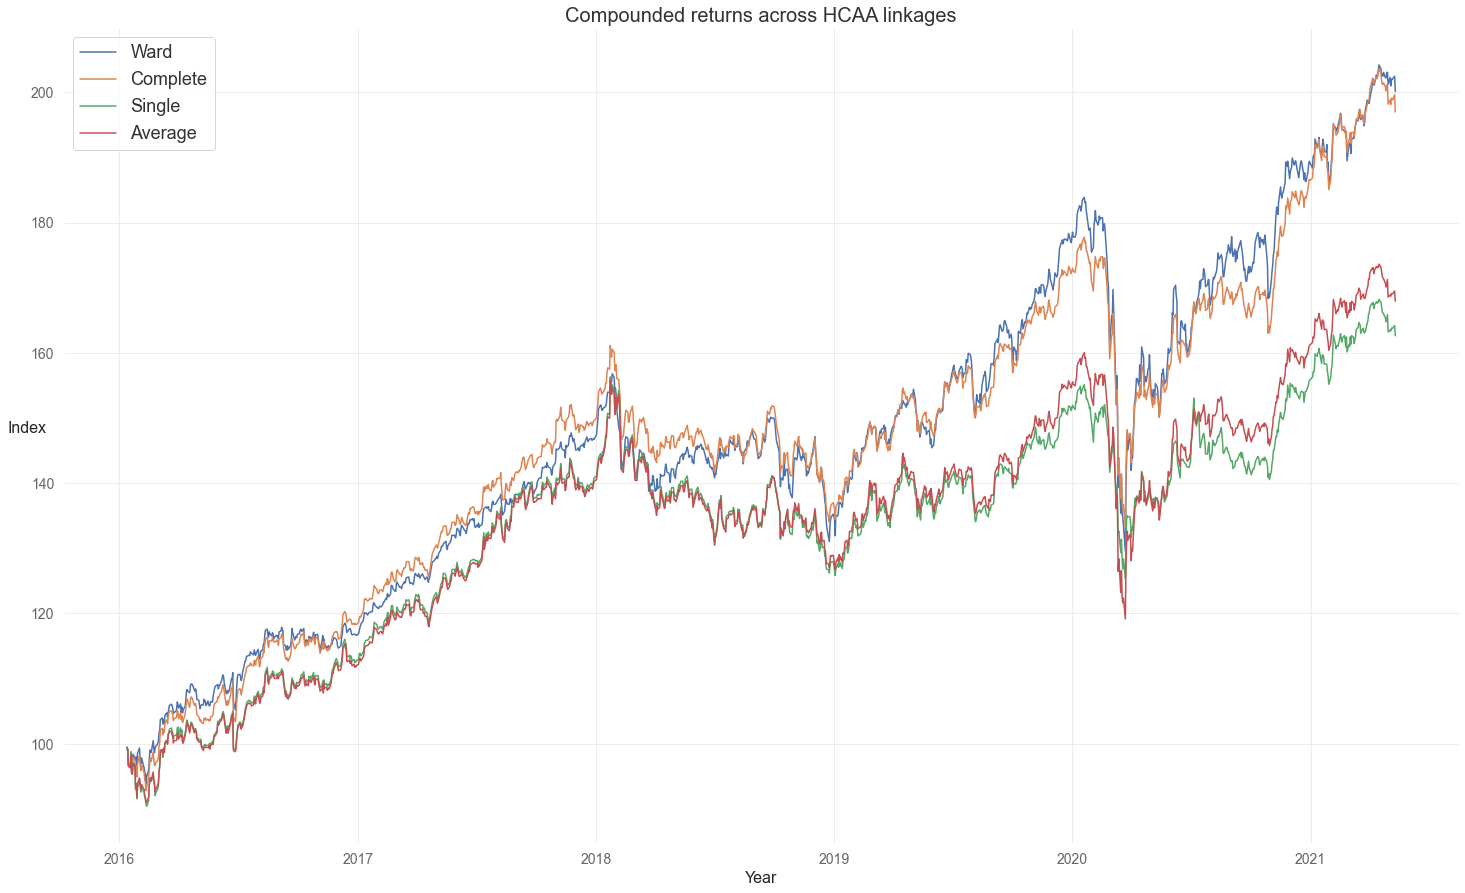

In [147]:
plt.figure(figsize=(25,15))
plt.plot(hcaa_cum_returns*100, label="Ward") # plotting by columns
plt.plot(hcaac_cum_returns*100, label="Complete")
plt.plot(hcaas_cum_returns*100, label="Single")
plt.plot(hcaaa_cum_returns*100, label="Average")


plt.title("Compounded returns across HCAA linkages", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=16).set_rotation(0)
plt.xlabel("Year", fontsize=16)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

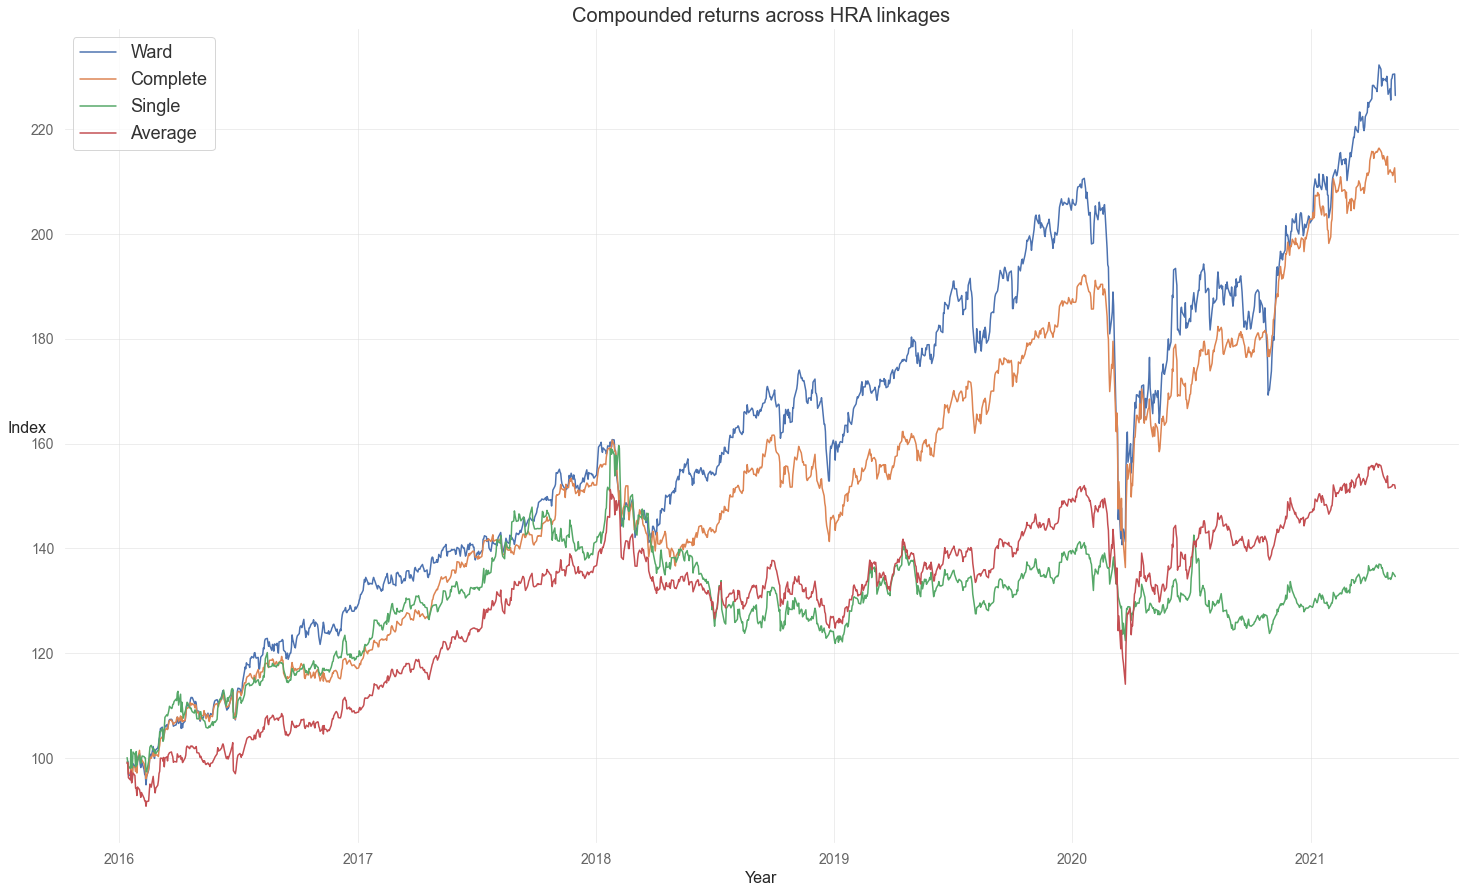

In [148]:
plt.figure(figsize=(25,15))
plt.plot(hra_cum_returns*100, label="Ward") # plotting by columns
plt.plot(hrac_cum_returns*100, label="Complete")
plt.plot(hras_cum_returns*100, label="Single")
plt.plot(hraa_cum_returns*100, label="Average")

plt.title("Compounded returns across HRA linkages", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=16).set_rotation(0)
plt.xlabel("Year", fontsize=16)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

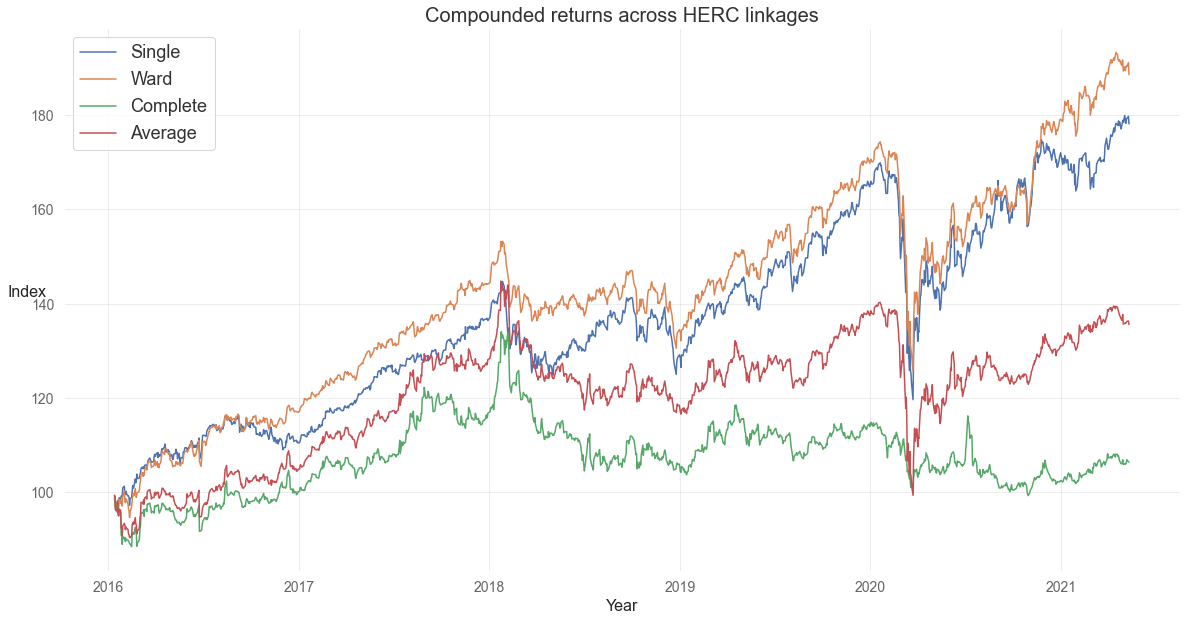

In [149]:
plt.figure(figsize=(20,10))
plt.plot(herc_cum_returns*100, label="Single") # plotting by columns
plt.plot(hercc_cum_returns*100, label="Ward")
plt.plot(hercs_cum_returns*100, label="Complete")
plt.plot(herca_cum_returns*100, label="Average")

plt.title("Compounded returns across HERC linkages", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=16).set_rotation(0)
plt.xlabel("Year", fontsize=16)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

### Side-by-side comparison

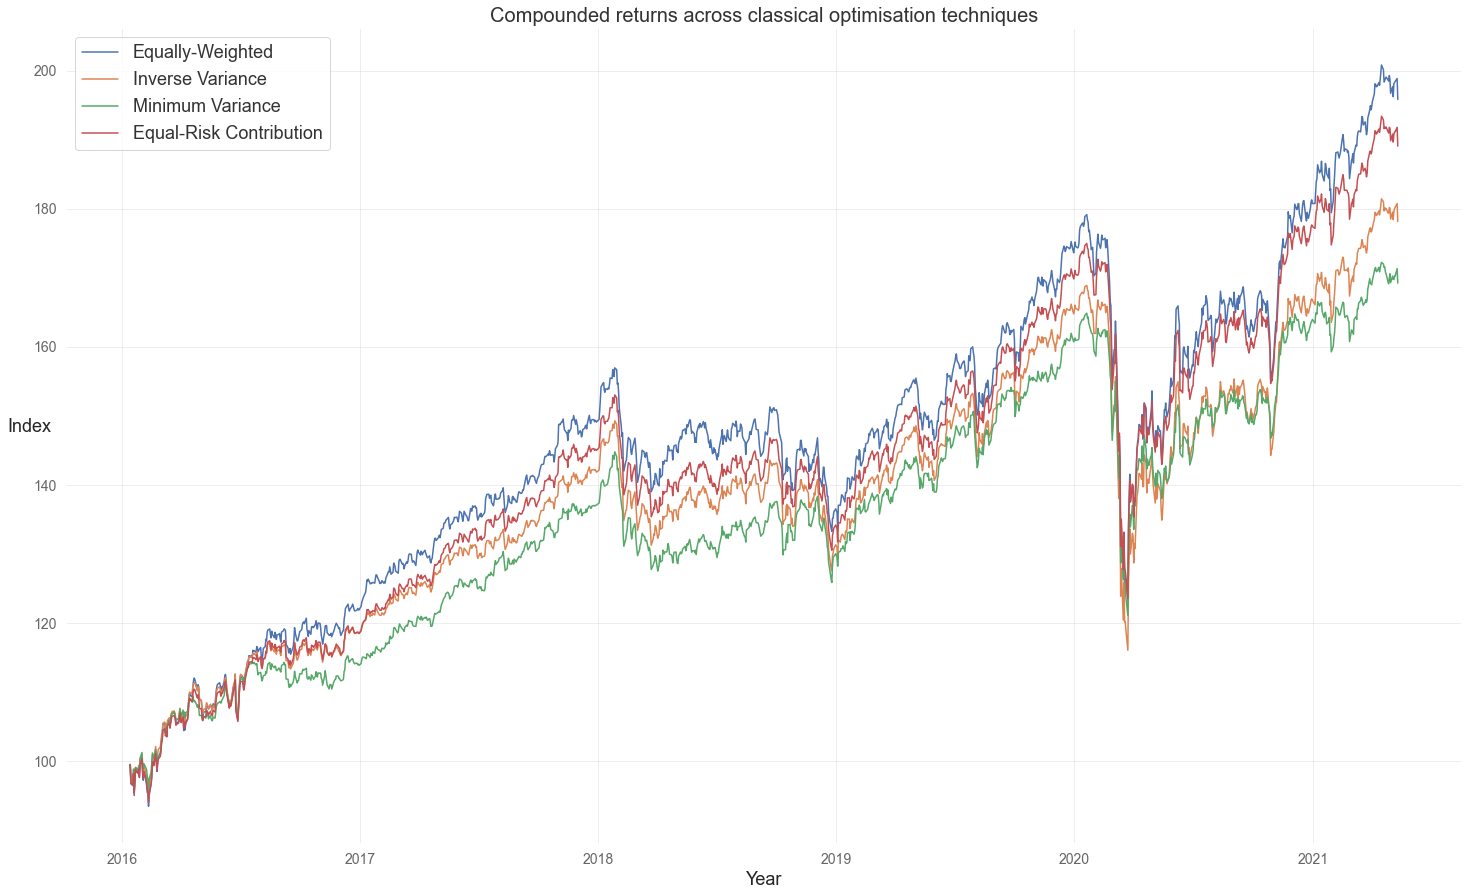

In [150]:
plt.figure(figsize=(25,15))
plt.plot(ew_cum_returns*100, label="Equally-Weighted") # plotting by columns
plt.plot(ivp_cum_returns*100, label="Inverse Variance")
plt.plot(mvp_cum_returns*100, label="Minimum Variance")
plt.plot(erc_cum_returns*100, label="Equal-Risk Contribution")


plt.title("Compounded returns across classical optimisation techniques", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=18).set_rotation(0)
plt.xlabel("Year", fontsize=18)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

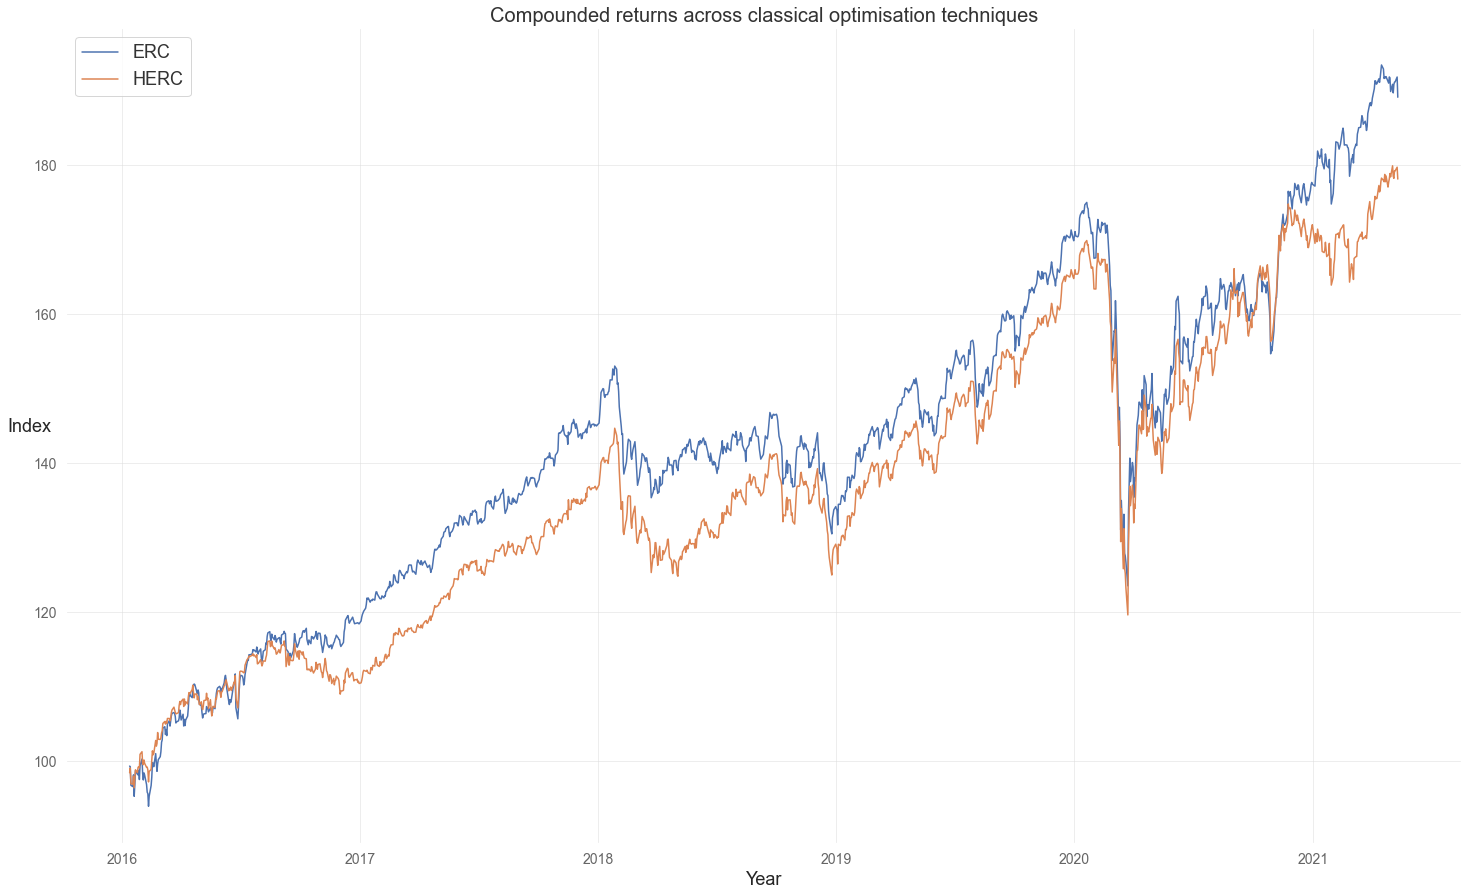

In [151]:
plt.figure(figsize=(25,15))
plt.plot(erc_cum_returns*100, label="ERC") # plotting by columns
plt.plot(herc_cum_returns*100, label="HERC")

plt.title("Compounded returns across classical optimisation techniques", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=18).set_rotation(0)
plt.xlabel("Year", fontsize=18)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

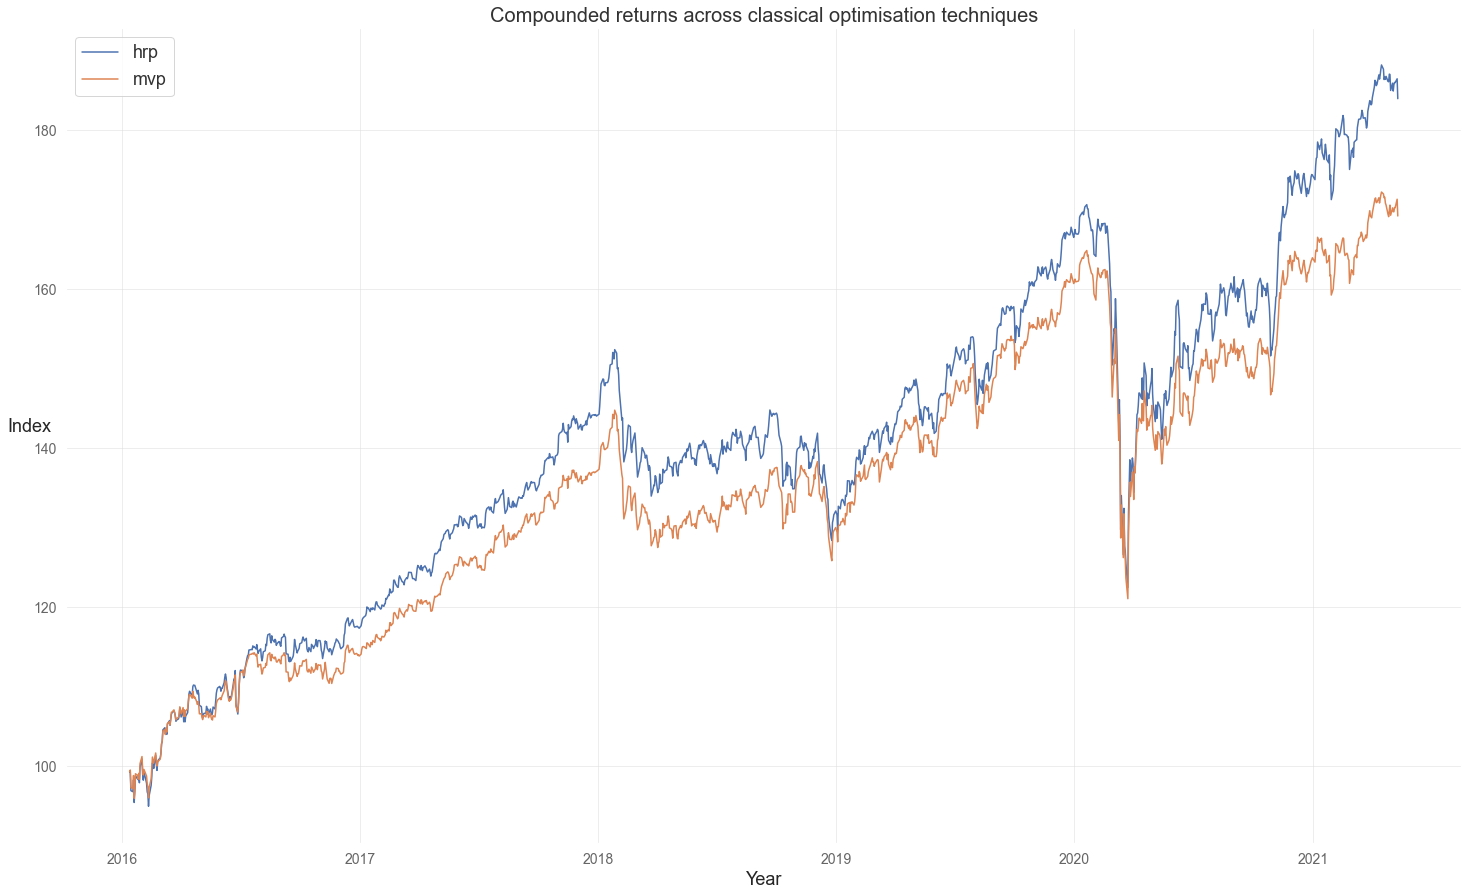

In [152]:
plt.figure(figsize=(25,15))
plt.plot(hrpw_cum_returns*100, label="hrp") # plotting by columns
plt.plot(mvp_cum_returns*100, label="mvp")

plt.title("Compounded returns across classical optimisation techniques", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=18).set_rotation(0)
plt.xlabel("Year", fontsize=18)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

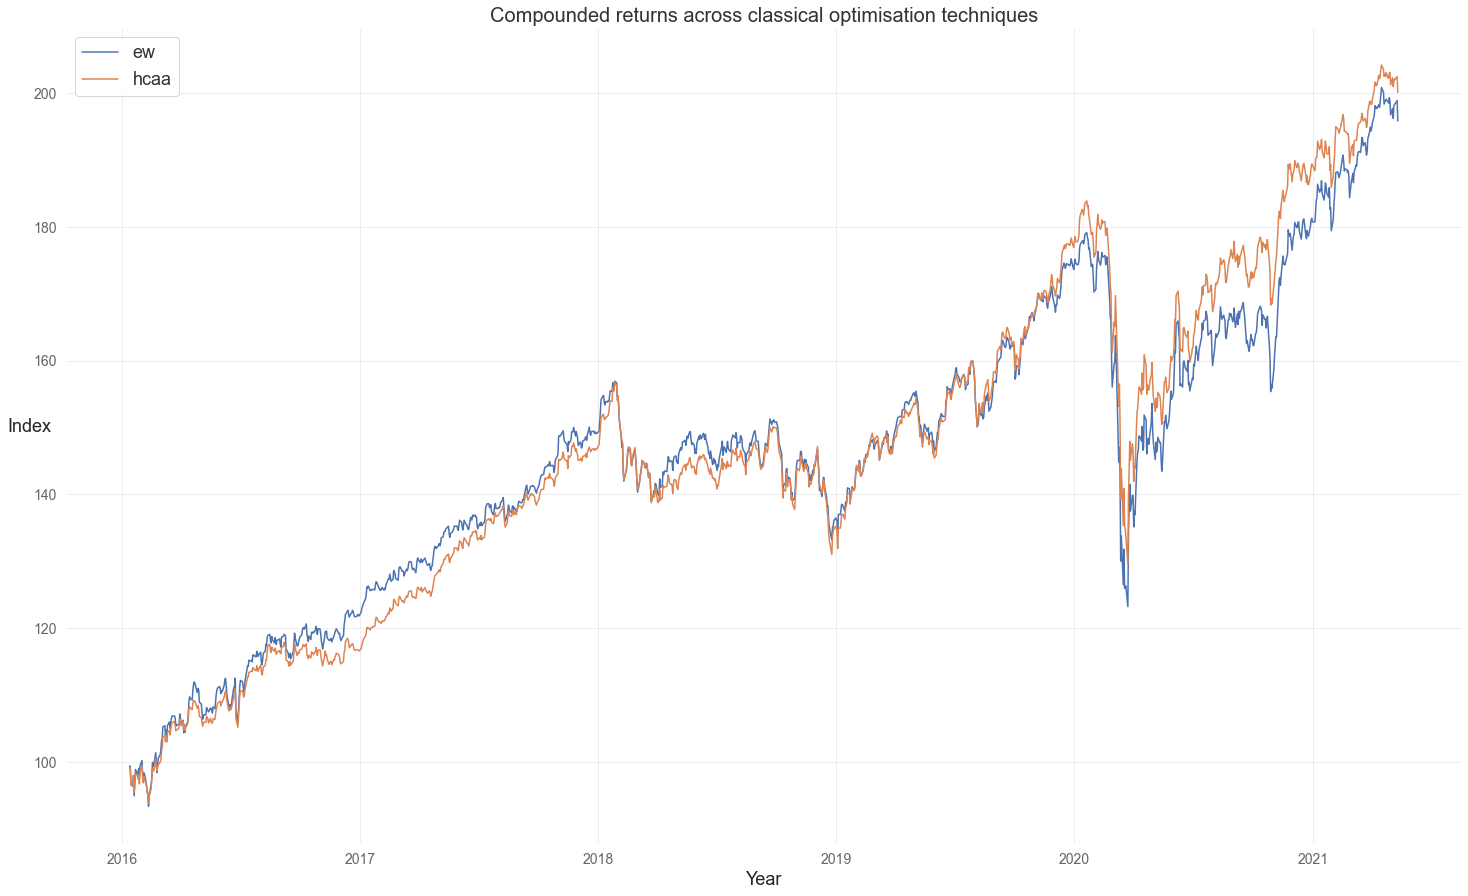

In [153]:
plt.figure(figsize=(25,15))
plt.plot(ew_cum_returns*100, label="ew") # plotting by columns
plt.plot(hcaa_cum_returns*100, label="hcaa")

plt.title("Compounded returns across classical optimisation techniques", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=18).set_rotation(0)
plt.xlabel("Year", fontsize=18)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

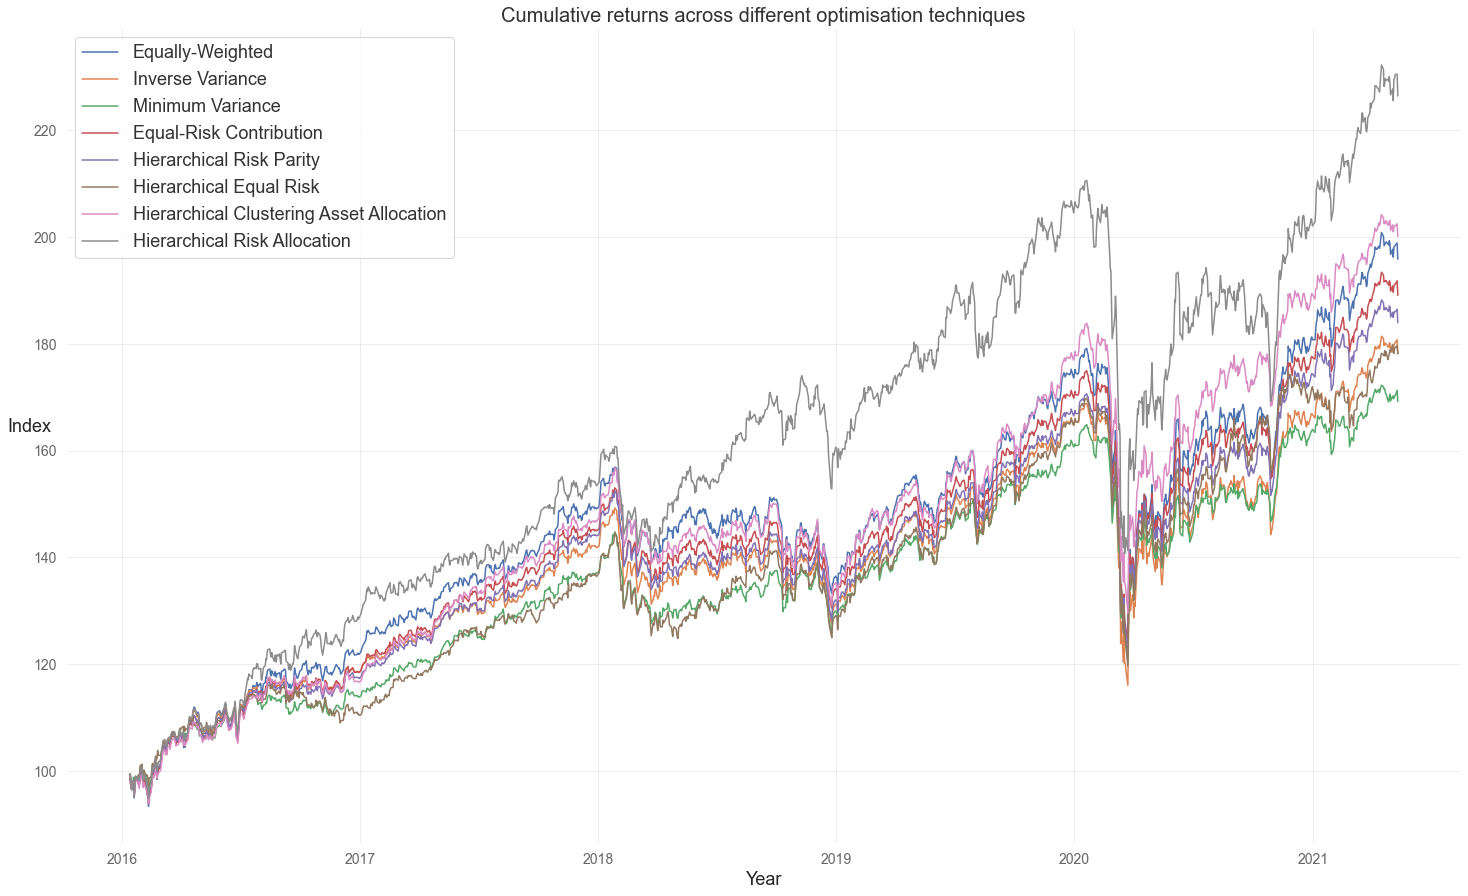

In [154]:
plt.figure(figsize=(25,15))
plt.plot(ew_cum_returns*100, label="Equally-Weighted") # plotting by columns
plt.plot(ivp_cum_returns*100, label="Inverse Variance")
plt.plot(mvp_cum_returns*100, label="Minimum Variance")
#plt.plot(pca_cum_returns*100, label="PCA Market Factor")
plt.plot(erc_cum_returns*100, label="Equal-Risk Contribution")
#plt.plot(erc_cum_returns*100, label="Most Diversified Portfolio")
plt.plot(hrpw_cum_returns*100, label="Hierarchical Risk Parity")
plt.plot(herc_cum_returns*100, label="Hierarchical Equal Risk")
plt.plot(hcaa_cum_returns*100, label="Hierarchical Clustering Asset Allocation")
plt.plot(hra_cum_returns*100, label="Hierarchical Risk Allocation")

plt.title("Cumulative returns across different optimisation techniques", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Index", fontsize=18).set_rotation(0)
plt.xlabel("Year", fontsize=18)
plt.legend(loc="upper left", prop={'size': 18})
plt.show()

#### Portfolio statistics

In [155]:
# Volatility of returns
def vol_ret(returns, freq='yearly'):
    if freq == 'yearly': freq = 252
    elif freq == 'monthly': freq = 21
    return returns.std() * np.sqrt(freq)

In [156]:
def avg_ret(returns, freq='yearly'):
    if freq == 'yearly': freq = 252
    elif freq == 'monthly': freq = 21
    else: freq = 1
    return (1 + returns.mean())**(freq/1) - 1

In [157]:
# Sharpe ratio
def sharpe(returns, rf=0):
    return ((returns - rf).mean() / (returns - rf).std()) * np.sqrt(252)

In [158]:
# Lower partial moment of the returns (for Sortino)
def lpm(returns, threshold, order=2):
    threshold_array = np.empty(len(returns))
    threshold_array.fill(threshold)
    diff = threshold_array - returns
    diff = diff.clip(0, None)
    return (np.sum(diff ** order) / len(returns))

In [159]:
def sortino(returns, rf=0):
    return ((returns - rf).mean() / np.sqrt(lpm(returns, 0))) * np.sqrt(252)

In [160]:
# Value-at-risk
def var(returns, alpha):
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    return abs(sorted_returns[index]) * np.sqrt(252)

In [161]:
# Maximum Drawdown
def max_dd(returns):
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    #end = dd.idxmin()
    #start = r.loc[:end].idxmax()
    return mdd#, start, end

In [162]:
#Value-at-risk
def var(returns, alpha):
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    return abs(sorted_returns[index]) * np.sqrt(252)

In [163]:
def calmar(returns, rf=0):
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    c = (avg_ret(returns)) / abs(mdd)
    return c

##### Comparing linkages

In [164]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [165]:
#hrp

In [166]:
avg_ret(hrpw_port_returns)
vol_ret(hrpw_port_returns)
sharpe(hrpw_port_returns)
sortino(hrpw_port_returns)
max_dd(hrpw_port_returns)
calmar(hrpw_port_returns)
var(hrpw_port_returns, 0.05)

0.12757808154071326

0.13579018941862972

0.884457505511291

1.2354340584075136

-0.28223775432270315

0.45202344330887734

0.1844859080403563

In [167]:
avg_ret(hrpa_port_returns)
vol_ret(hrpa_port_returns)
sharpe(hrpa_port_returns)
sortino(hrpa_port_returns)
max_dd(hrpa_port_returns)
calmar(hrpa_port_returns)
var(hrpa_port_returns, 0.05)

0.11595040121361411

0.13953098146160853

0.7864224983448549

1.085521476971497

-0.301999802711425

0.3839419766919853

0.1889756316833727

In [168]:
avg_ret(hrpc_port_returns)
vol_ret(hrpc_port_returns)
sharpe(hrpc_port_returns)
sortino(hrpc_port_returns)
max_dd(hrpc_port_returns)
calmar(hrpc_port_returns)
var(hrpc_port_returns, 0.05)

0.12482384801002921

0.13871752852453176

0.8481545318389258

1.1751805980713055

-0.2949495661134004

0.4232040401172779

0.18650730773940408

In [169]:
avg_ret(hrps_port_returns)
vol_ret(hrps_port_returns)
sharpe(hrps_port_returns)
sortino(hrps_port_returns)
max_dd(hrps_port_returns)
calmar(hrps_port_returns)
var(hrps_port_returns, 0.05)

0.12088581316177338

0.14115656792403852

0.808641939914425

1.1205724968106148

-0.30291680629802986

0.39907265179218154

0.1922524539457182

In [170]:
#hcaa

In [171]:
avg_ret(hcaas_port_returns)
vol_ret(hcaas_port_returns)
sharpe(hcaas_port_returns)
sortino(hcaas_port_returns)
max_dd(hcaas_port_returns)
calmar(hcaas_port_returns)
var(hcaas_port_returns, 0.05)

0.1010819204516673

0.12542905330695486

0.767857668351843

1.0808337227918323

-0.19828487769805525

0.5097812885438147

0.1900318757435155

In [172]:
avg_ret(hcaa_port_returns)
vol_ret(hcaa_port_returns)
sharpe(hcaa_port_returns)
sortino(hcaa_port_returns)
max_dd(hcaa_port_returns)
calmar(hcaa_port_returns)
var(hcaa_port_returns, 0.05)

0.14542478234185174

0.13882906858588867

0.9782687623701463

1.3740024636784527

-0.2953333627723499

0.49240892047116497

0.19172532645081897

In [173]:
avg_ret(hcaac_port_returns)
vol_ret(hcaac_port_returns)
sharpe(hcaac_port_returns)
sortino(hcaac_port_returns)
max_dd(hcaac_port_returns)
calmar(hcaac_port_returns)
var(hcaac_port_returns, 0.05)

0.14011489964450008

0.1255295965428759

1.0448784409405707

1.472177932516227

-0.2510783250881857

0.5580525503158738

0.17429885281393875

In [174]:
avg_ret(hcaaa_port_returns)
vol_ret(hcaaa_port_returns)
sharpe(hcaaa_port_returns)
sortino(hcaaa_port_returns)
max_dd(hcaaa_port_returns)
calmar(hcaaa_port_returns)
var(hcaaa_port_returns, 0.05)

0.10866736974078806

0.1333772162172633

0.7735942209729169

1.0839399132297507

-0.2553692070026665

0.42553043499740895

0.18729256279468146

In [175]:
#herc

In [176]:
avg_ret(herc_port_returns)
vol_ret(herc_port_returns)
sharpe(herc_port_returns)
sortino(herc_port_returns)
max_dd(herc_port_returns)
calmar(herc_port_returns)
var(herc_port_returns, 0.05)

0.12178504601634632

0.1411507293135499

0.8143593471574535

1.1337056910607903

-0.2956410115218705

0.41193556127221237

0.20029618147921982

In [177]:
avg_ret(hercs_port_returns)
vol_ret(hercs_port_returns)
sharpe(hercs_port_returns)
sortino(hercs_port_returns)
max_dd(hercs_port_returns)
calmar(hercs_port_returns)
var(hercs_port_returns, 0.05)

0.02029486591456564

0.13291966954747358

0.1511625087683503

0.20850056883185816

-0.2590937733031151

0.07833019549575425

0.18611414996590694

In [178]:
avg_ret(herca_port_returns)
vol_ret(herca_port_returns)
sharpe(herca_port_returns)
sortino(herca_port_returns)
max_dd(herca_port_returns)
calmar(herca_port_returns)
var(herca_port_returns, 0.05)

0.06882976470461188

0.14969105004985556

0.4447371047129302

0.6146316198859826

-0.31365427052673767

0.21944469172704742

0.1992273466067115

In [179]:
avg_ret(hercc_port_returns)
vol_ret(hercc_port_returns)
sharpe(hercc_port_returns)
sortino(hercc_port_returns)
max_dd(hercc_port_returns)
calmar(hercc_port_returns)
var(hercc_port_returns, 0.05)

0.13165834611348637

0.12938608627452752

0.9561652343653351

1.3397035622864766

-0.27846122826298003

0.472806742018489

0.17545501188754922

In [180]:
#hra

In [181]:
avg_ret(hra_port_returns)
vol_ret(hra_port_returns)
sharpe(hra_port_returns)
sortino(hra_port_returns)
max_dd(hra_port_returns)
calmar(hra_port_returns)
var(hra_port_returns, 0.05)

0.17661290133989116

0.16743142171950942

0.9716956443450478

1.3554067870280258

-0.33183861117173274

0.5322252908311825

0.220569737724202

In [182]:
avg_ret(hrac_port_returns)
vol_ret(hrac_port_returns)
sharpe(hrac_port_returns)
sortino(hrac_port_returns)
max_dd(hrac_port_returns)
calmar(hrac_port_returns)
var(hrac_port_returns, 0.05)

0.15554580062588186

0.13997196586996427

1.0331659261720112

1.460528516671464

-0.2906358735341822

0.5351913331772096

0.18290081792979543

In [183]:
avg_ret(hraa_port_returns)
vol_ret(hraa_port_returns)
sharpe(hraa_port_returns)
sortino(hraa_port_returns)
max_dd(hraa_port_returns)
calmar(hraa_port_returns)
var(hraa_port_returns, 0.05)

0.08790377191319054

0.13241166886305136

0.6363999958821547

0.8959123639572851

-0.24927908848233016

0.35263195339957887

0.17951443877198245

In [184]:
avg_ret(hras_port_returns)
vol_ret(hras_port_returns)
sharpe(hras_port_returns)
sortino(hras_port_returns)
max_dd(hras_port_returns)
calmar(hras_port_returns)
var(hras_port_returns, 0.05)

0.06512140326275961

0.13424226683821963

0.4700209978270923

0.6650586636471498

-0.23649575951378554

0.27535970791460906

0.2009796470938849

In [185]:
#classical methods

In [186]:
avg_ret(erc_port_returns)
vol_ret(erc_port_returns)
sharpe(erc_port_returns)
sortino(erc_port_returns)
max_dd(erc_port_returns)
calmar(erc_port_returns)
var(erc_port_returns, 0.05)

0.1337618564157046

0.13929048306329972

0.9015149745385513

1.2520102794369505

-0.2939015965730639

0.4551246334670775

0.1960361487953389

In [187]:
avg_ret(mvp_port_returns)
vol_ret(mvp_port_returns)
sharpe(mvp_port_returns)
sortino(mvp_port_returns)
max_dd(mvp_port_returns)
calmar(mvp_port_returns)
var(mvp_port_returns, 0.05)

0.1089366364125488

0.12454396947996434

0.8304118484432959

1.16079872330211

-0.26572391852076216

0.409961726512915

0.16486390101449644

In [188]:
avg_ret(ew_port_returns)
vol_ret(ew_port_returns)
sharpe(ew_port_returns)
sortino(ew_port_returns)
max_dd(ew_port_returns)
calmar(ew_port_returns)
var(ew_port_returns, 0.05)

0.1430946375259472

0.15167713748537937

0.8819699250386972

1.2222739801511235

-0.31203128280796455

0.45859067795459746

0.21717328570135

In [189]:
avg_ret(ivp_port_returns)
vol_ret(ivp_port_returns)
sharpe(ivp_port_returns)
sortino(ivp_port_returns)
max_dd(ivp_port_returns)
calmar(ivp_port_returns)
var(ivp_port_returns, 0.05)

0.12276871667289502

0.1467253042435094

0.7893956211309636

1.0929663516761374

-0.313030757469845

0.3921937820590094

0.20492357275882636

#### Final Allocations

In [190]:
pd.set_option('precision', 2)

In [191]:
hrpw_final = hrpw.T[1385]*100
hrpa_final = hrpa.T[1385]*100
hrpc_final = hrpc.T[1385]*100
hrps_final = hrps.T[1385]*100

In [192]:
hra_final = hra.T[1385]*100
hraa_final = hraa.T[1385]*100
hrac_final = hrac.T[1385]*100
hras_final = hras.T[1385]*100

In [193]:
herc_final = herc.T[1385]*100
herca_final = herca.T[1385]*100
hercc_final = hercc.T[1385]*100
hercs_final = hercs.T[1385]*100

In [194]:
hcaa_final = herc.T[1385]*100
hcaaa_final = hcaaa.T[1385]*100
hcaac_final = hcaac.T[1385]*100
hcaas_final = hcaas.T[1385]*100

In [195]:
hrp_all = pd.DataFrame(hrpw_final).merge(pd.DataFrame(hrpa_final), left_index=True, right_index=True)
hrp_all = pd.DataFrame(hrp_all).merge(pd.DataFrame(hrpc_final), left_index=True, right_index=True)
hrp_all = pd.DataFrame(hrp_all).merge(pd.DataFrame(hrps_final), left_index=True, right_index=True)
hrp_all.columns = ["HRP-W", "HRP-A", "HRP-C", "HRP-S"]
hrp_all

,HRP-W,HRP-A,HRP-C,HRP-S
,,,,
Alibaba,4.61,4.27,4.53,5.34
BASF,4.30,5.47,4.63,4.18
BHPB,2.23,2.67,4.07,2.21
BankChina,11.01,10.09,9.36,10.32
CocaCola,9.25,8.57,9.10,9.29
Medtronic,4.65,4.31,4.58,7.57
PG,8.98,8.32,8.84,9.02
RTX,5.13,4.75,5.05,8.35
SAP,2.92,4.99,3.87,3.05


In [196]:
hra_all = pd.DataFrame(hra_final).merge(pd.DataFrame(hraa_final), left_index=True, right_index=True)
hra_all = pd.DataFrame(hra_all).merge(pd.DataFrame(hrac_final), left_index=True, right_index=True)
hra_all = pd.DataFrame(hra_all).merge(pd.DataFrame(hras_final), left_index=True, right_index=True)
hra_all.columns = ["HRA-W", "HRA-A", "HRA-C", "HRA-S"]
hra_all

,HRA-W,HRA-A,HRA-C,HRA-S
,,,,
Alibaba,3.20,1.49,1.83,1.52
BASF,9.57,0.46,0.74,1.52
BHPB,9.57,0.46,0.74,1.52
BankChina,1.91,74.19,22.66,75.50
CocaCola,3.20,0.46,12.81,1.52
Medtronic,3.20,0.46,1.83,1.52
PG,3.20,0.46,12.81,1.52
RTX,3.20,0.46,1.83,1.52
SAP,9.57,0.46,0.74,1.52


In [197]:
herc_all = pd.DataFrame(herc_final).merge(pd.DataFrame(herca_final), left_index=True, right_index=True)
herc_all = pd.DataFrame(herc_all).merge(pd.DataFrame(hercc_final), left_index=True, right_index=True)
herc_all = pd.DataFrame(herc_all).merge(pd.DataFrame(hercs_final), left_index=True, right_index=True)
herc_all.columns = ["HERC-W", "HERC-A", "HERC-C", "HERC-S"]
herc_all

,HERC-W,HERC-A,HERC-C,HERC-S
,,,,
Alibaba,8.69,3.35,4.05,0.99
BASF,1.55,4.67,3.91,1.38
BHPB,0.81,2.44,2.05,0.72
BankChina,1.60,14.43,17.08,79.29
CocaCola,19.39,11.94,9.05,2.21
Medtronic,12.00,7.39,5.60,1.37
PG,18.82,11.58,8.78,2.15
RTX,13.24,8.15,6.18,1.51
SAP,0.88,2.64,2.21,0.78


In [198]:
hcaa_all = pd.DataFrame(hcaa_final).merge(pd.DataFrame(hcaaa_final), left_index=True, right_index=True)
hcaa_all = pd.DataFrame(hcaa_all).merge(pd.DataFrame(hcaac_final), left_index=True, right_index=True)
hcaa_all = pd.DataFrame(hcaa_all).merge(pd.DataFrame(hcaas_final), left_index=True, right_index=True)
hcaa_all.columns = ["HCAA-W", "HCAA-A", "HCAA-C", "HCAA-S"]
hcaa_all

,HCAA-W,HCAA-A,HCAA-C,HCAA-S
,,,,
Alibaba,8.69,2.78,4.17,1.79
BASF,1.55,2.78,3.12,1.79
BHPB,0.81,2.78,3.12,1.79
BankChina,1.60,25.00,25.00,50.00
CocaCola,19.39,5.00,4.17,1.79
Medtronic,12.00,5.00,4.17,1.79
PG,18.82,5.00,4.17,1.79
RTX,13.24,5.00,4.17,1.79
SAP,0.88,2.78,3.12,1.79


In [199]:
ew_final = pd.DataFrame(ew.iloc[1385]*100)
#pca_final = pd.DataFrame(pca.iloc[1385]*100)
mvp_final = pd.DataFrame(mvp.iloc[1385]*100)
ivp_final = pd.DataFrame(ivp.iloc[1385]*100)
erc_final = pd.DataFrame(erc.iloc[1385]*100)

In [200]:
classical = pd.DataFrame(ew_final).merge(pd.DataFrame(mvp_final), left_index=True, right_index=True)
classical = pd.DataFrame(classical).merge(pd.DataFrame(ivp_final), left_index=True, right_index=True)
classical = pd.DataFrame(classical).merge(pd.DataFrame(erc_final), left_index=True, right_index=True)
classical.columns = ["EW", "MVP", "IVP", "ERC"]
classical

,EW,MVP,IVP,ERC
,,,,
Alibaba,5.88,2.89,4.46,5.14
BASF,5.88,1.38,6.22,4.54
BHPB,5.88,0.32,3.25,3.53
BankChina,5.88,18.15,7.06,9.77
CocaCola,5.88,12.79,9.97,7.89
Medtronic,5.88,3.83,6.17,5.99
PG,5.88,15.06,9.67,8.36
RTX,5.88,1.48,6.80,5.19
SAP,5.88,1.52,3.52,4.30
